In [258]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv')

In [3]:
data_info.index = data_info['LoanStatNew']

In [4]:
data_info

,LoanStatNew,Description
LoanStatNew,,
loan_amnt,loan_amnt,The listed amount of the loan applied for by t...
term,term,The number of payments on the loan. Values are...
int_rate,int_rate,Interest Rate on the loan
installment,installment,The monthly payment owed by the borrower if th...
grade,grade,LC assigned loan grade
sub_grade,sub_grade,LC assigned loan subgrade
emp_title,emp_title,The job title supplied by the Borrower when ap...
emp_length,emp_length,Employment length in years. Possible values ar...
home_ownership,home_ownership,The home ownership status provided by the borr...


In [5]:
def feat_info(column_name):
    return data_info.loc[column_name]['Description']

In [6]:
feat_info('pub_rec')

'Number of derogatory public records'

In [7]:
data = pd.read_csv('lending_club_loan_two.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [10]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
data.shape

(396030, 27)

In [12]:
feat_info('mort_acc')

'Number of mortgage accounts.'

In [13]:
data['term'][0].split(' ')

['', '36', 'months']

In [14]:
data['month'] =  data['term'].apply(lambda x : x.split(' ')[1])

In [15]:
data.drop('term',1,inplace = True)

In [16]:
data['month'] =  pd.to_numeric(data['month'])

In [17]:
data['month']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: month, Length: 396030, dtype: int64

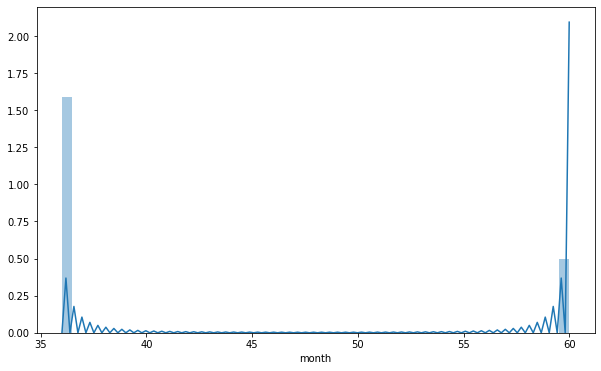

In [18]:
plt.figure(figsize = (10,6))
sns.distplot(data['month'])


In [19]:
def grade_to_numeric(grade):
    if grade == 'A' :
        return 1
    elif grade == 'B':
        return 2
    elif grade == 'C':
        return 3
    elif grade == 'D':
        return 4
    elif grade == 'E':
        return 5
    elif grade == 'F':
        return 6 
    else :
        return 7
        

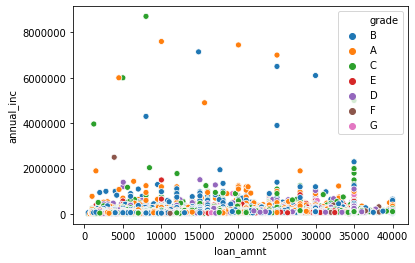

In [20]:
sns.scatterplot(data['loan_amnt'],data['annual_inc'],hue = data['grade'])

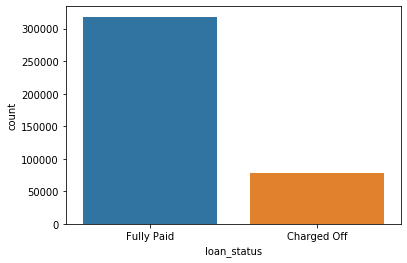

In [21]:
sns.countplot(x = 'loan_status',data = data)

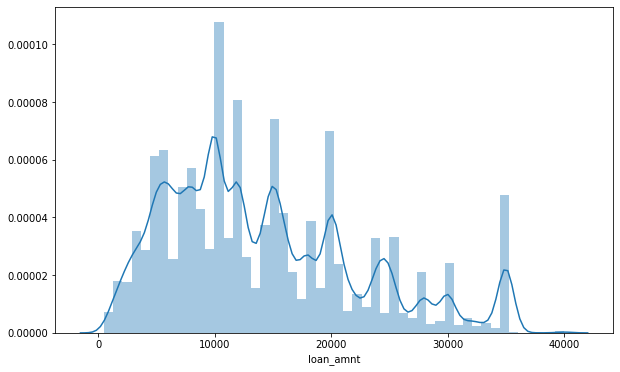

In [22]:
plt.figure(figsize = (10,6))
sns.distplot(data['loan_amnt'])

In [23]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,month
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.393862
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.434594
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.153378
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.060330
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.036508
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.079575
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.018758
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.084787
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,0.055166
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.101346


(14, 0)

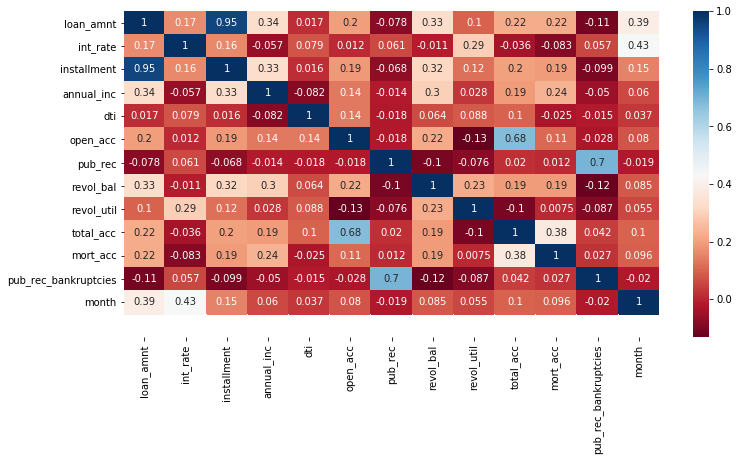

In [24]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot = True,cmap = 'RdBu')
plt.ylim(14,0)

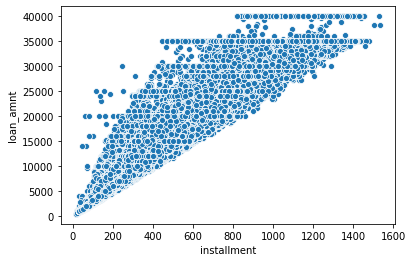

In [25]:
sns.scatterplot(x = 'installment',y = 'loan_amnt',data = data)

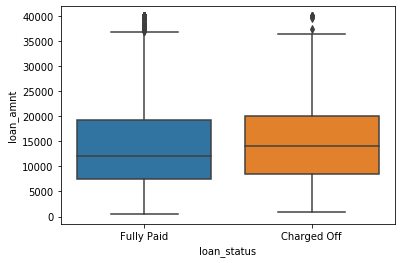

In [26]:
sns.boxplot(x = 'loan_status',y = 'loan_amnt',data = data)

In [27]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [28]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [29]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

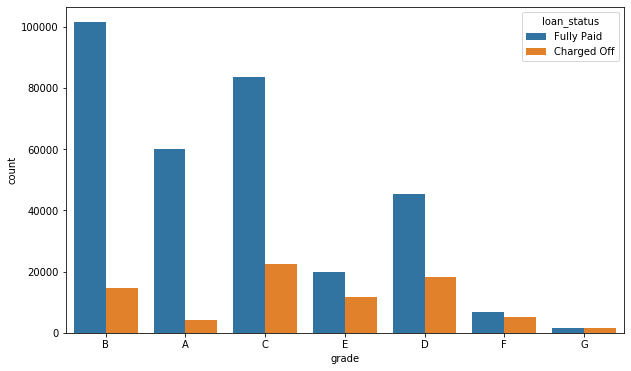

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'grade',data = data,hue = 'loan_status' )

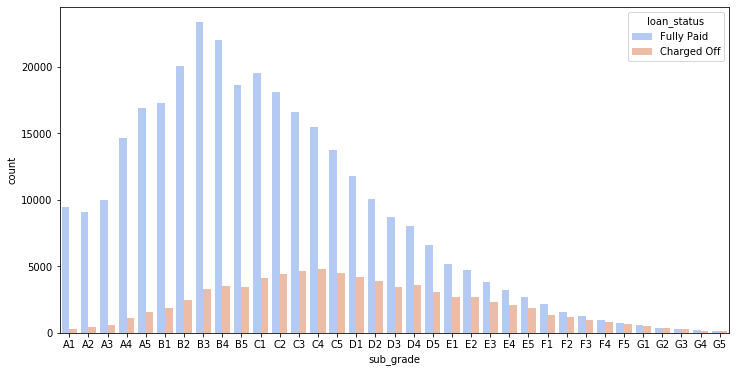

In [31]:
plt.figure(figsize = (12,6))
subgrade_order= sorted(data['sub_grade'].unique())
sns.countplot('sub_grade',data = data,palette = 'coolwarm',order = subgrade_order,hue = 'loan_status' )

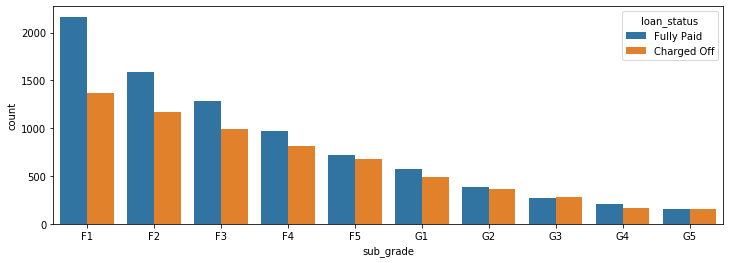

In [32]:
plt.figure(figsize = (12,4))
F_and_G =  data[(data['grade']=='G') | (data['grade'] == 'F')]
sns.countplot(x = 'sub_grade',data = F_and_G,hue = 'loan_status',order = subgrade_order[25:])

In [33]:
data['loan_repaid'] = data['loan_status'].apply(lambda x : 1 if x=='Fully Paid' else 0)

In [34]:
data[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


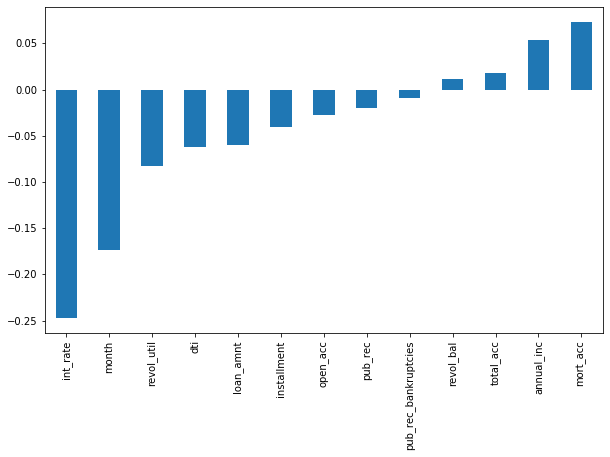

In [35]:
plt.figure(figsize = (10,6))
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [36]:
# DATA PROCESSING

In [37]:
data['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [38]:
data['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [39]:
data= data.drop('title',1)

In [40]:
data.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
month                       0
loan_repaid                 0
dtype: int64

In [41]:
feat_info('mort_acc')

'Number of mortgage accounts.'

In [42]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [43]:
data.corr()['mort_acc'].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
month                   0.096220
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [44]:
feat_info('total_acc')

"The total number of credit lines currently in the borrower's credit file"

In [45]:
data['total_acc'].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

In [46]:
total_avg = data.groupby('total_acc').mean()['mort_acc']

In [49]:
def return_avg(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_avg[total_acc]
    else :
        return mort_acc

In [50]:
data['mort_acc'] = data.apply(lambda x : return_avg(x['total_acc'],x['mort_acc']),axis = 1)

In [51]:
data.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
month                       0
loan_repaid                 0
dtype: int64

In [52]:
data = data.dropna()

In [53]:
data.isnull().sum()

loan_amnt               0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
month                   0
loan_repaid             0
dtype: int64

In [54]:
# DATA PREPROCESSING

In [55]:
# since GRADE IS part of sub_grade

In [56]:
data.drop('grade',inplace = True,axis = 1)

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
data.select_dtypes(['object']).columns

Index(['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [58]:
dummies = pd.get_dummies(data['sub_grade'],drop_first=True)
data  = pd.concat([data.drop('sub_grade',axis = 1),dummies],axis = 1)

In [59]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'month', 'loan_repaid', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [60]:
dummies = pd.get_dummies(data[['verification_status','purpose','initial_list_status']],drop_first=True)
data  = pd.concat([data.drop(['verification_status','purpose','initial_list_status'],axis = 1),dummies],axis = 1)

In [61]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'month', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w'],
 

In [62]:
data['home_ownership'].value_counts()

MORTGAGE    187021
RENT        151278
OWN          33728
OTHER          105
NONE            28
ANY              1
Name: home_ownership, dtype: int64

In [63]:
data['home_ownership'] = data['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [64]:
dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data  = pd.concat([data.drop('home_ownership',axis = 1),dummies],axis = 1)

In [65]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'month', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w', 'OTHER',
       'OWN

In [66]:
data['address'][0].split(' ')[-1]

'22690'

In [67]:
data['zipcode'] = data['address'].apply(lambda x : x.split(' ')[-1])

In [68]:
data['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 372161, dtype: object

In [69]:
dummies = pd.get_dummies(data['zipcode'],drop_first=True)
data  = pd.concat([data.drop('zipcode',axis = 1),dummies],axis = 1)

In [70]:
data.drop('address',1,inplace = True)

In [71]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'month',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w', 'OTHER',
       'OWN', 'RENT', 

In [88]:
data.select_dtypes(['object']).columns

Index([], dtype='object')

In [73]:
feat_info('issue_d')

'The month which the loan was funded'

In [74]:
data['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 372161, dtype: object

In [75]:
data.drop('issue_d',1,inplace = True)

In [76]:
feat_info('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [77]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x : x.split('-')[1])

In [78]:
data['earliest_cr_line'] # so its a  contineous data and dont need  dummy variable

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 372161, dtype: object

In [79]:
data['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [80]:
dummies = pd.get_dummies(data['application_type'],drop_first=True)
data  = pd.concat([data.drop('application_type',axis = 1),dummies],axis = 1)

In [81]:
data.drop(data.select_dtypes(['object']).columns,1,inplace = True)

In [82]:
# TRAINING DATA

In [89]:
data.columns
#data.drop('loan_status',1,inplace  = True)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'month', 'loan_repaid', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w', 'OTHER',
       'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700', 'INDIVIDUAL', 'JOIN

In [90]:
from sklearn.model_selection import train_test_split

In [130]:
X = data.drop('loan_repaid',1).values

In [131]:
X

array([[1.0000e+04, 1.1440e+01, 3.2948e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.0000e+03, 1.1990e+01, 2.6568e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.5600e+04, 1.0490e+01, 5.0697e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+03, 9.9900e+00, 1.6132e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.1000e+04, 1.5310e+01, 5.0302e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+03, 1.3610e+01, 6.7980e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [132]:
y = data['loan_repaid'].values

In [133]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
#data = data.sample(frac = 0.1,random_state = 101)
print(len(data))

372161


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [145]:
y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [146]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()

In [138]:
X_train = scaler.fit_transform(X_train)

In [140]:
X_train

array([[0.11392405, 0.47721075, 0.10779915, ..., 0.        , 1.        ,
        0.        ],
       [0.59493671, 0.48850799, 0.38975312, ..., 1.        , 1.        ,
        0.        ],
       [0.74683544, 0.31281652, 0.44270061, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23037975, 0.13946241, 0.19025782, ..., 0.        , 1.        ,
        0.        ],
       [0.21518987, 0.        , 0.16798772, ..., 0.        , 1.        ,
        0.        ],
       [0.29113924, 0.153097  , 0.24175578, ..., 0.        , 1.        ,
        0.        ]])

In [139]:
X_test  = scaler.transform(X_test)

In [141]:
X_test

array([[0.49367089, 0.25983638, 0.42703248, ..., 0.        , 1.        ,
        0.        ],
       [0.05316456, 0.45461628, 0.0504767 , ..., 0.        , 1.        ,
        0.        ],
       [0.74683544, 0.4273471 , 0.68717097, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11392405, 0.02765875, 0.08967339, ..., 0.        , 1.        ,
        0.        ],
       [0.14683544, 0.14998052, 0.12173443, ..., 0.        , 1.        ,
        0.        ],
       [0.36708861, 0.30346708, 0.32293623, ..., 0.        , 1.        ,
        0.        ]])

In [142]:
X_train.shape

(297728, 77)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [155]:
model = Sequential()

model.add(Dense(78,'relu'))
model.add(Dropout(0.2)) 

model.add(Dense(39,'relu'))
model.add(Dropout(0.2))

model.add(Dense(19,'relu'))
model.add(Dropout(0.2))

model.add(Dense(1,'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer  = 'adam' )

In [156]:
model.fit(x = X_train,y = y_train , epochs = 25 , validation_data=(X_test,y_test),batch_size= 256 )

Epoch 1/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2981 - val_loss: 0.2586
Epoch 2/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2561
Epoch 3/25
1163/1163 [==============================] - 4s 4ms/step - loss: 0.2587 - val_loss: 0.2554
Epoch 4/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2570 - val_loss: 0.2549
Epoch 5/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2564 - val_loss: 0.2552
Epoch 6/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2557 - val_loss: 0.2549
Epoch 7/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2551 - val_loss: 0.2549
Epoch 8/25
1163/1163 [==============================] - 3s 3ms/step - loss: 0.2546 - val_loss: 0.2544
Epoch 9/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.2543 - val_loss: 0.2545
Epoch 10/25
1163/1163 [==============================] - 4s 3ms/step - loss: 0.254

In [148]:
# SAVE

In [157]:
X_train.shape

(297728, 77)

In [149]:
from tensorflow.keras.models import load_model

In [106]:
#model.save('my_model.h5')

In [158]:
model.history.history

{'loss': [0.29808536171913147,
  0.2618023157119751,
  0.2586943507194519,
  0.2569987177848816,
  0.2564104497432709,
  0.2556843161582947,
  0.2551040053367615,
  0.2545941472053528,
  0.2542804181575775,
  0.2541951537132263,
  0.2538835406303406,
  0.25370675325393677,
  0.25336048007011414,
  0.25318777561187744,
  0.2530134916305542,
  0.25286516547203064,
  0.25276145339012146,
  0.252591073513031,
  0.25231441855430603,
  0.25215020775794983,
  0.2518685460090637,
  0.25203344225883484,
  0.25177207589149475,
  0.25165435671806335,
  0.25166165828704834],
 'val_loss': [0.25862419605255127,
  0.2560781240463257,
  0.2553907632827759,
  0.2548651397228241,
  0.25522735714912415,
  0.2548942267894745,
  0.25487220287323,
  0.2544305622577667,
  0.25447410345077515,
  0.25448888540267944,
  0.25518926978111267,
  0.2547348439693451,
  0.2545524537563324,
  0.2548646926879883,
  0.25474220514297485,
  0.25553882122039795,
  0.25511080026626587,
  0.2549590766429901,
  0.254927098751

In [159]:
loss_df  = pd.DataFrame(model.history.history)

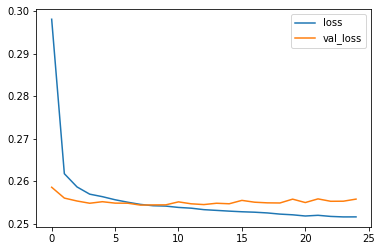

In [160]:
loss_df.plot()

In [161]:
prediction = model.predict(X_test)

In [167]:
prediction= prediction

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
X_test

array([[0.49367089, 0.25983638, 0.42703248, ..., 0.        , 1.        ,
        0.        ],
       [0.05316456, 0.45461628, 0.0504767 , ..., 0.        , 1.        ,
        0.        ],
       [0.74683544, 0.4273471 , 0.68717097, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11392405, 0.02765875, 0.08967339, ..., 0.        , 1.        ,
        0.        ],
       [0.14683544, 0.14998052, 0.12173443, ..., 0.        , 1.        ,
        0.        ],
       [0.36708861, 0.30346708, 0.32293623, ..., 0.        , 1.        ,
        0.        ]])

In [123]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [200]:
prediction.shape
round_predict = np.zeros(prediction.shape)

In [201]:
for i in prediction:
    print(i)

[1.]
[1.]
[1.]
[8.8140125e-21]
[0.9675183]
[0.8861847]
[1.]
[1.]
[1.]
[1.]
[0.92426395]
[0.7035708]
[0.9229779]
[1.]
[0.84573644]
[1.]
[0.8860248]
[0.91245973]
[0.92958105]
[0.7839532]
[0.7750783]
[0.9108249]
[0.7659677]
[0.9219494]
[1.9537188e-23]
[0.79804695]
[0.71824867]
[0.7090886]
[0.4766031]
[0.8807404]
[0.82816637]
[0.8333602]
[1.]
[0.9262731]
[0.8287457]
[1.]
[1.]
[0.75070685]
[0.6296735]
[1.]
[0.91759086]
[0.7748518]
[0.87353754]
[0.95803523]
[0.86012626]
[0.905022]
[1.3450828e-22]
[1.]
[0.7843809]
[0.796569]
[0.9492905]
[1.]
[0.7278973]
[0.7525146]
[1.]
[0.8385836]
[0.1777927]
[0.9184445]
[1.]
[0.81535757]
[1.]
[1.]
[0.7452266]
[0.78598213]
[0.79264313]
[5.3726947e-19]
[0.92722434]
[1.]
[1.]
[1.]
[0.7321164]
[1.]
[0.63619107]
[0.94053006]
[0.8636706]
[1.]
[0.87600374]
[0.9662404]
[1.]
[1.]
[1.]
[0.6570053]
[0.8464425]
[0.94098914]
[1.4722711e-23]
[0.47664964]
[1.]
[0.97617316]
[0.5242144]
[0.6993613]
[0.827419]
[1.]
[1.]
[0.9284546]
[0.90576565]
[0.8612937]
[0.6301615]
[1.]
[

[0.69803524]
[0.7611531]
[7.189312e-22]
[1.3977695e-21]
[0.85841143]
[1.]
[0.6331179]
[0.57677734]
[9.969428e-21]
[1.]
[0.9338106]
[1.]
[0.8614699]
[5.210407e-22]
[0.8778827]
[0.79963267]
[1.6004512e-26]
[0.8907255]
[0.61430717]
[0.9180933]
[0.785666]
[1.]
[0.8144778]
[1.]
[1.]
[0.78460586]
[0.9591011]
[0.89902145]
[0.84420216]
[0.94472945]
[0.9092394]
[0.54335845]
[0.8199103]
[0.6269543]
[0.9411837]
[1.]
[1.]
[0.80643153]
[0.8840749]
[0.9068637]
[0.91406333]
[0.6139686]
[1.]
[0.9093399]
[0.5571237]
[0.9337946]
[1.]
[1.1108101e-18]
[1.]
[0.77088463]
[1.]
[1.]
[0.8499259]
[0.77461505]
[0.6146741]
[0.50270766]
[8.7420195e-21]
[0.8914871]
[1.]
[1.]
[0.8168092]
[0.661725]
[0.57566214]
[1.]
[1.]
[1.]
[0.7728627]
[1.]
[0.87913465]
[0.7936431]
[0.9608693]
[0.77851593]
[0.9376437]
[1.]
[0.6436647]
[0.8692633]
[0.90532243]
[1.]
[0.8057948]
[1.]
[0.8780121]
[1.]
[2.0254548e-17]
[0.61491054]
[0.99999154]
[0.9457661]
[0.8915267]
[0.67320323]
[0.5424314]
[0.90923005]
[0.84633124]
[0.99996424]
[1.61

[0.81606615]
[0.9342358]
[0.99999774]
[0.8299916]
[1.]
[0.9113257]
[0.89471734]
[1.]
[0.8750299]
[0.8660587]
[1.]
[0.7347649]
[0.86498743]
[0.59405243]
[0.8486151]
[0.92974246]
[0.8238739]
[0.8376951]
[1.]
[1.]
[0.8701756]
[0.875388]
[1.]
[0.8836465]
[0.51235867]
[1.]
[1.]
[0.9295153]
[1.]
[0.915537]
[0.6818804]
[0.6831578]
[0.95169246]
[0.7603455]
[0.565341]
[0.8169444]
[0.80589956]
[0.6827249]
[1.]
[1.]
[0.6444109]
[0.7558149]
[0.9499249]
[1.]
[0.9579843]
[0.8427628]
[1.]
[0.8122339]
[5.192068e-24]
[1.]
[0.6269615]
[0.7930411]
[1.]
[0.7987573]
[1.]
[0.7362689]
[1.]
[1.8553263e-16]
[0.976612]
[1.]
[1.]
[3.2738113e-23]
[1.]
[0.94465226]
[0.8946428]
[1.]
[0.90979654]
[0.9063108]
[1.]
[0.733496]
[0.7910836]
[0.81209016]
[0.8782834]
[0.9910993]
[0.8426291]
[0.71290076]
[1.]
[0.96499914]
[4.1498514e-23]
[0.85051185]
[0.6644366]
[0.81420636]
[0.95968163]
[0.8892498]
[0.796908]
[0.6950437]
[0.84549546]
[1.]
[0.836045]
[0.97266865]
[0.87113404]
[1.]
[0.66646934]
[0.91194975]
[0.8619969]
[0.80

[0.60534924]
[0.9696439]
[0.9072809]
[1.]
[0.8647101]
[0.8533604]
[0.90740216]
[1.0648667e-25]
[0.74902266]
[0.7374744]
[0.7354234]
[1.0156317e-22]
[0.9128556]
[0.9164154]
[1.]
[1.]
[0.86806]
[1.]
[1.]
[0.816666]
[4.5416316e-23]
[1.]
[0.8400743]
[1.]
[1.]
[1.]
[0.7978503]
[0.9999998]
[2.0305633e-22]
[1.]
[1.]
[1.]
[1.]
[0.8314755]
[0.74356484]
[1.3364661e-20]
[0.8798197]
[1.]
[5.1674507e-23]
[1.]
[1.]
[0.7253932]
[1.9679168e-22]
[1.]
[0.66839284]
[0.77311856]
[0.9922128]
[0.8656839]
[5.2292885e-20]
[1.]
[0.8691796]
[1.]
[0.80743146]
[1.0735478e-22]
[1.]
[1.]
[0.8968152]
[0.9434547]
[0.90128386]
[1.]
[0.99999976]
[0.83137953]
[0.9235789]
[0.8371257]
[0.8677453]
[1.]
[0.63132393]
[1.]
[0.77642465]
[2.7811358e-19]
[0.8808172]
[0.851182]
[0.8657069]
[0.806427]
[0.99999976]
[2.4775183e-22]
[1.3143021e-19]
[0.89102626]
[0.92613316]
[1.]
[0.8150024]
[1.]
[3.3231343e-23]
[1.]
[0.69679487]
[0.9999988]
[1.]
[0.675133]
[1.05841055e-19]
[2.9404875e-22]
[2.1880447e-23]
[0.74353325]
[0.871861]
[1.]


[0.93202084]
[0.83507293]
[0.8270875]
[0.7074566]
[0.94786525]
[0.7711574]
[1.7669992e-22]
[0.94271314]
[0.8036454]
[1.]
[0.7883431]
[1.]
[1.]
[1.]
[0.8702536]
[2.6463138e-22]
[0.83094203]
[0.872288]
[0.86859065]
[0.8527247]
[0.92397153]
[0.7877578]
[0.90575886]
[0.7819769]
[0.7402019]
[0.9110707]
[1.]
[0.5820263]
[0.81447685]
[1.]
[0.90089667]
[0.7593772]
[1.]
[0.88996565]
[0.7938776]
[0.8876871]
[1.]
[0.99306154]
[0.8495689]
[0.61819357]
[0.89092755]
[0.6937608]
[1.1793957e-20]
[0.9188619]
[0.80443126]
[0.9285332]
[1.2191835e-22]
[1.]
[0.6835664]
[0.8175584]
[3.2539962e-19]
[0.9287431]
[1.]
[0.9567956]
[1.]
[0.84501946]
[0.61891675]
[1.]
[1.]
[1.]
[0.70265275]
[0.6157191]
[1.]
[0.8445649]
[1.]
[0.8618516]
[0.8676833]
[0.9156869]
[1.]
[1.]
[0.659032]
[1.]
[1.]
[1.]
[0.9037255]
[0.8984473]
[0.86101997]
[1.]
[5.763301e-23]
[5.4594413e-21]
[0.76298296]
[0.90547025]
[1.]
[0.6578219]
[0.66813505]
[0.72872084]
[0.80236626]
[0.7976649]
[0.8514799]
[1.]
[0.7150551]
[0.88267446]
[0.9157522]
[0

[0.854607]
[1.]
[0.55963546]
[0.8872248]
[1.]
[2.5936878e-27]
[0.73758036]
[1.]
[0.9253379]
[1.]
[3.4408308e-17]
[1.]
[1.]
[0.7720897]
[0.8549434]
[0.85543245]
[0.9244641]
[0.5472032]
[1.]
[0.94047976]
[0.69867134]
[0.9124733]
[1.]
[0.7495463]
[0.9631565]
[2.0296937e-24]
[0.9999992]
[0.7874779]
[1.]
[0.8898152]
[0.61660194]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.8688655]
[0.90350914]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[3.9876125e-25]
[0.97243977]
[1.]
[0.5770067]
[0.827234]
[1.]
[1.]
[0.91178095]
[1.]
[0.78848684]
[2.4461054e-22]
[0.8933401]
[0.8986721]
[0.73348546]
[0.99999976]
[0.8777054]
[0.7572627]
[0.8941227]
[0.84396696]
[0.63212967]
[0.79478705]
[0.80166495]
[1.]
[1.]
[1.]
[1.]
[0.5016813]
[1.]
[1.]
[0.9293399]
[2.474477e-22]
[0.83665514]
[0.9096645]
[0.97777975]
[0.8898915]
[0.69264925]
[0.8226452]
[0.580107]
[0.89319986]
[0.72953826]
[1.]
[1.]
[5.431588e-20]
[0.96518624]
[2.79998e-25]
[0.8118638]
[0.9240508]
[1.]
[1.]
[1.]
[0.9113846]
[0.7065832]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.899

[1.]
[0.9034864]
[0.91088605]
[0.83569425]
[0.8797761]
[0.89522004]
[0.7791192]
[0.73009497]
[7.465361e-21]
[0.7365394]
[1.]
[1.]
[1.]
[1.]
[0.8320445]
[1.]
[0.83987796]
[1.]
[0.75225973]
[1.]
[0.8238913]
[1.]
[0.7719548]
[3.1602915e-17]
[0.87516975]
[1.]
[1.]
[0.82986426]
[0.882301]
[1.]
[0.9587688]
[0.9999995]
[0.93162847]
[0.9262229]
[0.6987473]
[1.]
[0.4798573]
[0.91846097]
[0.8394102]
[0.6828079]
[1.]
[0.8309821]
[1.]
[0.83056176]
[0.88803256]
[1.]
[0.80232346]
[1.]
[1.9624219e-22]
[1.]
[1.]
[0.84180117]
[1.175752e-21]
[1.]
[1.]
[1.]
[1.]
[0.9164937]
[0.7650374]
[0.9829861]
[0.73381805]
[0.77096653]
[0.7191062]
[0.792161]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.8116019]
[0.8184419]
[0.8834081]
[1.]
[0.7814534]
[0.8821963]
[0.74387187]
[1.]
[0.8737382]
[4.0231315e-20]
[1.]
[1.]
[8.9155966e-21]
[1.]
[0.85863143]
[2.0915572e-27]
[9.654737e-22]
[0.79624456]
[2.3693218e-27]
[0.5970455]
[0.5319268]
[1.]
[0.95226675]
[1.3125758e-23]
[0.7802925]
[0.8948988]
[0.9218315]
[0.9999999]
[0.9162876]
[0.6141

[1.]
[1.]
[1.]
[0.7979083]
[0.8878611]
[0.77143186]
[0.89106923]
[0.7475773]
[1.]
[0.8405189]
[0.8914959]
[1.]
[0.98330367]
[0.73171985]
[0.7384633]
[0.9002582]
[1.]
[0.873221]
[0.7643322]
[0.8711455]
[1.]
[0.91755915]
[0.8711446]
[1.]
[1.]
[0.77101576]
[0.8076752]
[1.2163644e-21]
[1.]
[0.8981912]
[1.]
[1.]
[1.]
[0.77416533]
[0.811833]
[1.]
[0.6627206]
[0.69551015]
[0.56508774]
[0.8971703]
[1.]
[1.]
[0.73056304]
[0.80081356]
[0.6414977]
[0.873984]
[1.536158e-20]
[0.69170225]
[0.86167955]
[1.]
[6.660513e-26]
[0.8941077]
[1.]
[1.]
[1.]
[0.92311126]
[0.9999955]
[0.5303476]
[1.]
[0.6972323]
[1.]
[0.61524403]
[0.9550129]
[0.88782394]
[0.844432]
[1.]
[0.978812]
[1.]
[0.86880267]
[0.7959]
[1.]
[0.95674753]
[1.]
[0.99999976]
[0.9142606]
[0.99258673]
[0.77027]
[1.]
[1.]
[0.93867576]
[1.]
[0.9904587]
[0.68749547]
[1.]
[0.601371]
[5.983793e-23]
[0.9715708]
[0.64053154]
[0.95731676]
[0.7900013]
[0.6584239]
[0.8160925]
[0.7948363]
[1.]
[0.8942022]
[1.]
[1.1684365e-22]
[0.8356631]
[1.]
[0.7458313]
[

[0.8487257]
[0.9001602]
[0.677948]
[0.84472996]
[1.]
[1.]
[5.49271e-24]
[0.82036155]
[0.93254805]
[0.94940746]
[0.8859353]
[0.78656554]
[0.86933887]
[0.82716453]
[3.6883504e-23]
[3.25428e-20]
[5.703234e-19]
[7.785871e-23]
[3.730223e-21]
[0.937953]
[1.]
[7.038234e-18]
[1.]
[0.7095554]
[0.9305954]
[0.8916813]
[1.]
[0.95075357]
[0.8451574]
[0.82435393]
[0.87034345]
[1.]
[0.85421896]
[0.9149233]
[0.9609556]
[0.8141775]
[0.8496939]
[0.9086391]
[0.8459522]
[1.]
[1.]
[0.6841544]
[0.71919084]
[1.]
[9.1423956e-20]
[0.78687716]
[1.]
[0.6069852]
[0.68893856]
[0.6851249]
[0.63968134]
[1.]
[0.9427603]
[5.040212e-20]
[1.]
[1.]
[1.]
[1.]
[0.83717525]
[1.]
[1.]
[0.94591486]
[1.]
[1.]
[0.877323]
[0.669746]
[0.59769386]
[0.6681477]
[0.59027535]
[0.99999976]
[1.]
[0.9068099]
[1.]
[0.93052936]
[0.86878103]
[0.9201937]
[1.]
[5.302742e-23]
[1.5763623e-23]
[0.788818]
[1.]
[0.7852043]
[0.9045199]
[0.89397717]
[1.]
[0.55607855]
[1.]
[1.6681873e-23]
[2.0262833e-23]
[0.81073093]
[1.]
[0.83706856]
[0.57012796]
[1

[1.]
[1.]
[3.598995e-23]
[1.]
[1.]
[0.999998]
[2.1083862e-21]
[1.]
[0.5104504]
[1.]
[0.87666786]
[0.8888308]
[0.7418462]
[0.77292645]
[0.7362451]
[1.]
[0.9123642]
[0.90597504]
[1.]
[1.]
[1.]
[0.9231396]
[0.88597214]
[0.5590962]
[0.93040496]
[1.]
[0.8927629]
[1.]
[0.8329115]
[1.]
[1.]
[0.8999886]
[1.]
[4.7779783e-24]
[1.]
[0.84319526]
[1.]
[0.73710287]
[1.3660421e-20]
[2.8194648e-18]
[0.940382]
[1.]
[0.62592924]
[0.824203]
[0.9184004]
[0.8630338]
[1.]
[1.]
[0.7619057]
[0.8326894]
[0.87759066]
[1.]
[0.7132983]
[0.9642072]
[2.5503413e-20]
[3.6204468e-24]
[1.]
[0.798539]
[1.]
[6.656227e-24]
[0.6421243]
[0.8644286]
[0.9533767]
[0.71431327]
[0.7604368]
[0.77983767]
[0.6380972]
[0.86399984]
[1.]
[0.8501048]
[0.80670214]
[4.4164033e-21]
[0.6640363]
[0.8553542]
[0.90964174]
[1.5076336e-23]
[0.83301866]
[1.]
[0.6272694]
[0.8672744]
[0.8091692]
[0.7746812]
[0.9283622]
[0.8062404]
[1.]
[0.8737636]
[0.9052075]
[1.]
[0.9127387]
[0.7879771]
[1.]
[0.88602257]
[1.]
[0.7904791]
[1.]
[2.8265558e-22]
[1.]

[0.7888105]
[1.]
[0.9153954]
[1.2507714e-19]
[0.9244256]
[1.]
[0.83890694]
[0.9369489]
[0.75139165]
[0.7740799]
[2.82091e-23]
[0.68887156]
[0.8501743]
[0.7772926]
[1.]
[0.9036295]
[1.]
[0.7775171]
[0.7552281]
[1.]
[0.7849316]
[1.]
[1.]
[0.66810393]
[0.65994775]
[0.5749073]
[1.]
[0.89253724]
[0.8761854]
[0.8184104]
[0.8498902]
[0.83708954]
[0.79882413]
[0.7512052]
[0.8748854]
[0.86768806]
[0.92047167]
[1.6915399e-21]
[2.3056873e-26]
[1.]
[0.8077165]
[0.92816234]
[0.86355937]
[1.]
[1.]
[3.4471457e-27]
[1.7157641e-25]
[0.7721396]
[0.9047923]
[1.]
[0.9230616]
[0.80989456]
[0.901148]
[0.76184726]
[1.]
[1.]
[6.609857e-21]
[5.704131e-25]
[1.]
[1.]
[1.]
[1.]
[0.90682155]
[0.8342513]
[1.]
[0.65802336]
[1.]
[1.]
[1.]
[0.8479276]
[1.]
[0.9050138]
[0.91699696]
[1.]
[0.9504734]
[0.8839116]
[2.2241807e-23]
[1.]
[0.8644471]
[0.9126698]
[0.749631]
[0.667228]
[0.9346962]
[0.51460415]
[1.]
[1.]
[0.9500058]
[0.7657032]
[0.9130062]
[1.]
[1.]
[0.92987293]
[0.9788562]
[8.996019e-28]
[1.]
[1.]
[1.]
[1.]
[1.]

[0.87489986]
[0.91153824]
[0.9108554]
[0.94123596]
[0.82690364]
[1.]
[0.86028594]
[0.8996918]
[1.]
[1.]
[0.96012235]
[0.89857864]
[0.89419633]
[0.99648]
[0.8917207]
[0.9446796]
[1.]
[1.]
[0.9999999]
[0.8792951]
[0.5049324]
[1.]
[0.96494377]
[0.6715483]
[1.]
[0.93138367]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.87097955]
[1.]
[0.9383427]
[0.8834596]
[1.]
[0.81342566]
[1.]
[0.87533027]
[1.]
[1.]
[0.6177981]
[0.6665142]
[0.83378845]
[1.]
[0.7483818]
[0.7157855]
[1.]
[0.8107165]
[0.77571726]
[1.]
[0.8526089]
[0.6555306]
[1.]
[0.96494186]
[2.3862026e-19]
[0.9505322]
[0.8549541]
[0.9999999]
[0.78648543]
[1.]
[1.]
[0.88685715]
[0.83649284]
[1.]
[3.9379554e-17]
[0.8755648]
[0.6374316]
[0.776062]
[1.]
[1.]
[1.]
[1.]
[2.259865e-20]
[0.8939388]
[1.]
[1.]
[0.9999993]
[0.79001725]
[1.]
[0.8243916]
[0.6066212]
[2.5959554e-19]
[0.98953474]
[1.]
[1.]
[0.79253936]
[0.94146836]
[1.]
[0.96285045]
[0.88675904]
[0.78993076]
[0.9028103]
[0.9041817]
[1.]
[0.61120313]
[0.8198068]
[2.1438733e-17]
[0.9285394]
[0.9

[1.]
[1.]
[1.]
[0.9753144]
[0.5610875]
[0.8525927]
[0.9278741]
[1.]
[0.854522]
[4.2198603e-19]
[1.]
[1.]
[0.9121505]
[0.8512622]
[1.]
[0.97178024]
[0.8965349]
[0.83188206]
[0.79489744]
[0.9372256]
[0.6863096]
[1.]
[0.9111618]
[0.86567426]
[0.8198308]
[0.8921741]
[1.]
[1.]
[1.]
[0.77565134]
[1.]
[0.8794681]
[1.]
[0.91465163]
[0.8636682]
[1.]
[0.89145124]
[1.]
[0.9753394]
[5.0880887e-25]
[0.9999998]
[0.7654314]
[0.59680635]
[0.5876845]
[1.]
[0.9220985]
[1.]
[1.]
[0.8491709]
[0.80386496]
[1.]
[1.0213129e-20]
[0.8271584]
[1.]
[0.9219468]
[1.]
[0.86359894]
[0.83932304]
[1.]
[1.]
[0.99999666]
[1.]
[1.]
[0.6171034]
[0.859941]
[0.67505074]
[0.9156685]
[0.6355293]
[1.]
[0.9307903]
[0.83985186]
[0.78327906]
[1.]
[0.9192598]
[0.57814753]
[0.6129567]
[0.90477276]
[0.7475504]
[1.]
[0.80329233]
[0.68754786]
[0.89779997]
[1.]
[0.86300296]
[1.]
[1.]
[1.]
[1.]
[0.99999964]
[0.77364844]
[1.]
[0.79506826]
[1.]
[0.9522469]
[0.864195]
[0.93486655]
[0.56350935]
[0.91843224]
[1.]
[0.67358065]
[0.8250163]
[1.

[1.]
[1.]
[1.]
[1.]
[0.827254]
[0.65970075]
[0.8803516]
[1.]
[0.6826458]
[1.]
[0.8164284]
[1.]
[0.7749996]
[1.]
[0.9081614]
[0.99999934]
[1.]
[0.6647215]
[1.]
[0.86533487]
[0.90789825]
[1.]
[0.8892058]
[0.83366036]
[0.99999976]
[0.6508174]
[0.9646058]
[0.56708467]
[0.83044213]
[0.90694094]
[1.]
[0.8046918]
[0.8158642]
[0.91400516]
[0.81775]
[1.2902015e-16]
[0.872118]
[1.]
[1.]
[1.]
[1.]
[3.3290587e-16]
[0.8716385]
[0.7117324]
[0.8165585]
[0.9999995]
[0.9238044]
[0.8929682]
[0.70947057]
[0.84118176]
[0.8642383]
[0.92721176]
[0.9266877]
[0.8649188]
[0.9060476]
[1.]
[0.84288746]
[4.7753822e-20]
[0.8590417]
[0.9999967]
[0.7966316]
[0.75026584]
[0.6631895]
[1.]
[0.99173105]
[1.]
[0.8898028]
[1.]
[0.87757075]
[1.]
[0.9293568]
[0.8868698]
[1.]
[1.]
[0.8727759]
[0.6039454]
[1.]
[0.9636503]
[0.91165054]
[1.]
[0.9199393]
[0.92023575]
[2.1520853e-23]
[0.7198292]
[1.]
[8.338138e-19]
[0.92169917]
[1.]
[0.64554864]
[0.93978226]
[0.90803]
[0.8855592]
[1.]
[0.9999997]
[0.8796288]
[0.8537301]
[0.810246

[0.8886527]
[1.]
[1.]
[1.7060915e-25]
[4.954098e-24]
[1.]
[1.]
[0.80653083]
[1.5060513e-25]
[0.8668885]
[1.]
[2.8085007e-21]
[1.]
[0.7523172]
[1.]
[1.]
[0.6576309]
[0.99999225]
[0.8155309]
[0.99999666]
[0.9999995]
[0.89921236]
[0.8766074]
[0.78452855]
[0.88706446]
[0.75761694]
[1.9375369e-14]
[0.94241214]
[0.6314806]
[0.8478458]
[1.]
[0.5909624]
[1.]
[0.9072758]
[0.8228585]
[1.]
[0.6771557]
[0.576085]
[0.87935567]
[0.93010175]
[1.]
[2.0849143e-19]
[0.76180124]
[0.54273367]
[0.878637]
[0.8355103]
[1.]
[4.9635537e-25]
[0.7157497]
[0.4455721]
[1.]
[1.]
[1.4907642e-21]
[1.]
[1.]
[0.5916773]
[1.]
[0.78861165]
[0.6507496]
[0.9999943]
[0.6556699]
[0.715024]
[0.99999976]
[0.7586741]
[0.9333963]
[0.687155]
[1.]
[0.8273171]
[1.]
[0.70066226]
[0.5184963]
[0.999997]
[1.]
[1.]
[1.]
[0.881992]
[1.]
[0.75704867]
[1.]
[1.]
[0.999998]
[0.87978876]
[1.]
[1.]
[2.6481577e-25]
[0.99999964]
[9.419199e-19]
[1.]
[0.8871587]
[0.9026045]
[1.]
[0.7618742]
[0.63413775]
[0.66179717]
[0.53042173]
[0.77937233]
[0.83

[0.78663516]
[0.8150917]
[0.85887814]
[1.]
[1.]
[3.700333e-21]
[1.]
[0.7706516]
[1.]
[0.94515455]
[5.5541404e-20]
[0.8641437]
[1.]
[0.76202196]
[1.]
[0.6427255]
[1.]
[0.777774]
[0.85587454]
[1.]
[0.9316223]
[1.]
[0.93804485]
[0.9377694]
[0.8751172]
[0.5836649]
[0.9196049]
[1.]
[0.67147344]
[0.9365562]
[0.67377454]
[1.0843808e-22]
[0.8858644]
[0.82615054]
[1.]
[1.]
[0.91706973]
[7.135364e-26]
[1.]
[0.7180797]
[0.8339509]
[1.]
[1.]
[0.846033]
[5.5302473e-21]
[1.]
[0.9599905]
[0.8126701]
[1.]
[0.9387258]
[3.043058e-20]
[0.77013034]
[0.7935987]
[0.8845116]
[0.636608]
[0.70134354]
[0.8477371]
[1.]
[0.9698441]
[0.85593134]
[0.68121153]
[0.6350341]
[2.7627175e-18]
[0.8366091]
[0.8937072]
[0.57957095]
[0.96632946]
[0.7482962]
[0.89064395]
[0.86178005]
[0.8620374]
[0.999768]
[1.7550016e-22]
[0.7736459]
[1.]
[0.9706856]
[0.9507854]
[0.7331073]
[0.8333856]
[0.7544967]
[0.99998903]
[0.6511249]
[0.9618571]
[0.87541413]
[1.]
[1.0740298e-17]
[1.]
[0.9287248]
[1.]
[1.]
[0.8207586]
[1.]
[0.6964537]
[0.

[1.]
[0.7809546]
[0.5249629]
[1.]
[0.8718823]
[0.9295357]
[1.]
[0.8086053]
[0.89494133]
[0.7966296]
[0.8486998]
[1.]
[1.]
[2.8323274e-24]
[9.3646505e-23]
[0.6355973]
[0.9821862]
[0.88985]
[1.]
[0.79547167]
[0.91938484]
[1.]
[0.88916266]
[1.]
[0.68181455]
[1.]
[0.93398523]
[0.830536]
[1.]
[1.]
[1.]
[0.82736504]
[0.9184139]
[0.8868779]
[0.8178313]
[0.9705279]
[0.62997425]
[0.8181657]
[0.9356412]
[8.829656e-22]
[1.]
[1.]
[0.8676877]
[0.87303996]
[0.9534684]
[0.78464425]
[4.2104293e-23]
[1.]
[0.80594385]
[0.85511184]
[0.90424204]
[1.]
[0.80457217]
[1.]
[0.9062458]
[0.91581714]
[1.]
[0.85654926]
[0.9999987]
[3.8951712e-22]
[1.]
[0.7125616]
[0.95807934]
[0.8841187]
[1.]
[0.9021281]
[0.67420876]
[1.]
[1.1727106e-21]
[0.8693313]
[0.8967469]
[1.]
[0.88182104]
[2.9822038e-23]
[1.]
[1.]
[0.76612103]
[1.]
[1.]
[3.3009954e-25]
[0.8506353]
[0.84606695]
[0.89014643]
[0.9144945]
[1.]
[0.97260654]
[1.]
[1.]
[0.76699686]
[1.5171017e-22]
[0.8262024]
[0.8984891]
[0.91509724]
[8.308692e-22]
[1.]
[0.7950136

[0.5089428]
[0.76271397]
[1.]
[0.70948887]
[0.86997205]
[0.8124703]
[0.6052128]
[0.9221565]
[1.]
[0.9124801]
[1.]
[0.8902117]
[1.]
[5.8638295e-22]
[0.80201703]
[0.8817408]
[1.]
[0.92170334]
[1.]
[1.]
[0.99999917]
[0.6652789]
[0.8793757]
[1.]
[0.999999]
[0.56612265]
[0.8675839]
[1.]
[0.8777823]
[0.63572323]
[1.]
[0.9192431]
[1.]
[0.85324883]
[1.]
[0.8911339]
[1.]
[0.81410587]
[0.83663404]
[0.99999535]
[1.]
[0.947181]
[0.76586175]
[3.1053797e-24]
[0.8824782]
[0.8795753]
[0.99999666]
[4.317959e-17]
[0.55509204]
[1.]
[0.8470491]
[1.07643825e-23]
[0.7063449]
[1.]
[2.4811261e-26]
[0.9672791]
[1.1611584e-22]
[1.]
[7.194964e-22]
[1.]
[0.8155134]
[0.90704507]
[0.83428043]
[0.8540626]
[0.8265111]
[1.]
[0.86012226]
[0.7504006]
[1.]
[1.]
[1.]
[1.]
[0.83133876]
[0.86160487]
[0.7859763]
[0.81535995]
[1.]
[1.]
[1.]
[0.88136756]
[0.8531121]
[1.]
[0.85209274]
[0.48908016]
[0.9180601]
[0.9687399]
[0.7717177]
[0.8608072]
[0.95119065]
[0.843079]
[1.4708709e-19]
[1.]
[0.8562577]
[0.8127377]
[0.77483755]
[1

[0.89332753]
[1.]
[0.9563029]
[1.]
[0.6648675]
[0.65351766]
[0.8830402]
[0.90367943]
[1.]
[0.94124764]
[1.]
[1.]
[1.]
[0.69479465]
[8.3911854e-23]
[0.42095754]
[0.9345543]
[0.78185594]
[1.]
[0.901155]
[1.]
[4.256515e-25]
[1.]
[7.198086e-24]
[0.8450026]
[0.7111591]
[1.]
[1.]
[0.67367494]
[1.]
[0.7228511]
[0.9143772]
[0.86992764]
[1.]
[0.788354]
[0.87466294]
[1.]
[1.]
[0.87428844]
[0.90094995]
[0.87256765]
[1.]
[0.58387977]
[0.56261545]
[1.]
[1.]
[0.9109643]
[0.98047066]
[1.]
[0.9023955]
[1.]
[0.65247583]
[0.8971484]
[1.]
[1.]
[0.90472555]
[1.]
[0.8584046]
[0.616106]
[0.6871674]
[0.8566129]
[1.]
[1.]
[1.]
[0.90492]
[1.7233487e-23]
[1.]
[1.]
[0.8890104]
[1.]
[1.]
[1.]
[0.99999964]
[1.]
[0.60281605]
[0.78335917]
[1.]
[1.]
[0.71136606]
[0.65184003]
[0.889801]
[1.]
[0.6778954]
[0.8956297]
[0.6875076]
[0.84227717]
[1.]
[0.70065707]
[0.76677525]
[0.89250153]
[1.]
[1.]
[1.]
[0.9366007]
[0.59535134]
[0.5935551]
[0.88444495]
[0.4869118]
[0.89003915]
[0.9094622]
[0.7927682]
[0.8755338]
[0.9122274]

[0.8989161]
[1.19670144e-23]
[0.79621744]
[0.8099823]
[0.8349735]
[0.953516]
[0.90447724]
[1.]
[0.8331685]
[0.5600311]
[1.]
[1.]
[1.]
[4.25096e-20]
[5.466837e-22]
[1.]
[0.915218]
[0.64458483]
[1.]
[0.9999457]
[1.]
[0.9267297]
[1.]
[0.6734011]
[1.]
[3.597087e-23]
[0.84088194]
[0.92071486]
[1.]
[0.78208685]
[0.7127957]
[0.90938354]
[0.5486617]
[1.]
[0.6655556]
[0.88333595]
[1.]
[1.]
[1.]
[0.81570756]
[1.]
[0.6295866]
[0.8658633]
[1.]
[0.895229]
[0.6924379]
[0.8084753]
[1.]
[1.]
[0.8037895]
[0.82503706]
[1.]
[0.90157026]
[0.98062015]
[0.88808155]
[1.]
[1.0283537e-20]
[0.86933225]
[0.94451404]
[0.92718244]
[0.7551758]
[1.]
[0.9502819]
[0.80056334]
[0.87739974]
[0.7544806]
[0.64212614]
[0.9520741]
[1.2484029e-18]
[0.7169839]
[1.]
[0.7619072]
[1.]
[0.7798071]
[0.9007428]
[0.7168111]
[2.0584575e-25]
[0.66037834]
[0.7659518]
[2.5778347e-21]
[0.83676946]
[0.71142507]
[0.65688527]
[1.]
[1.]
[0.8260187]
[0.86916363]
[0.926503]
[0.6603666]
[0.9537099]
[0.8376194]
[2.4645045e-19]
[0.91658664]
[1.]


[0.5585892]
[1.]
[0.8854457]
[1.]
[0.8485422]
[0.99999976]
[0.8476684]
[0.848639]
[0.93779945]
[0.6717869]
[8.356388e-18]
[0.9310268]
[0.9111705]
[0.9604013]
[1.]
[0.7926998]
[1.]
[0.87593055]
[0.9256255]
[1.]
[0.76840687]
[1.]
[1.]
[1.]
[1.]
[0.9923641]
[0.832608]
[1.]
[1.]
[0.8791777]
[1.]
[0.63854927]
[0.8450134]
[1.]
[0.9243489]
[1.]
[1.]
[1.]
[0.9389603]
[0.84533757]
[1.]
[0.999998]
[0.8298917]
[0.8746533]
[0.90664756]
[0.85878855]
[0.6268155]
[1.]
[0.9327493]
[0.53853744]
[0.83183086]
[0.6918917]
[1.]
[1.]
[1.]
[1.]
[0.77428406]
[1.]
[6.467706e-22]
[1.]
[0.83587396]
[0.75231516]
[0.9478855]
[2.9846395e-23]
[0.9144412]
[0.836292]
[1.]
[0.9265698]
[1.]
[0.85765874]
[0.693468]
[1.]
[1.]
[1.]
[0.99999976]
[1.]
[0.84769523]
[0.9393124]
[5.0832195e-25]
[0.83876824]
[0.86887765]
[0.90477085]
[0.71556026]
[0.8652307]
[0.93245625]
[1.]
[0.77944064]
[0.90686667]
[1.220465e-19]
[0.79907]
[0.84168243]
[0.7046679]
[0.7270938]
[0.8785793]
[1.]
[1.994053e-17]
[0.9999995]
[0.904614]
[0.96280646]

[0.5000609]
[0.8430424]
[0.8788623]
[0.99999964]
[0.8909409]
[0.7588571]
[1.3217893e-18]
[1.]
[1.]
[0.7358714]
[1.]
[6.4377315e-20]
[1.]
[0.8987509]
[0.81829953]
[0.8991691]
[0.7402976]
[1.]
[1.]
[0.839276]
[0.79145133]
[1.]
[0.6427062]
[0.845232]
[1.]
[0.66009957]
[2.1543473e-20]
[0.8569299]
[0.92011386]
[0.77767575]
[1.]
[7.514955e-23]
[1.]
[1.]
[0.8988496]
[0.8982363]
[1.]
[1.]
[1.]
[0.9557923]
[0.73784524]
[0.84610635]
[0.9257274]
[4.4570326e-24]
[0.8495015]
[0.75417423]
[0.5530706]
[0.81576514]
[0.7586447]
[0.64197177]
[1.7297483e-18]
[0.8640059]
[1.]
[0.94185185]
[1.]
[3.3562357e-21]
[0.70512414]
[0.58099437]
[0.93703204]
[2.2789827e-25]
[0.87246776]
[0.90479016]
[1.]
[2.3157683e-21]
[3.0394368e-21]
[1.]
[0.9359642]
[1.]
[0.99999666]
[1.]
[0.86375475]
[0.67552644]
[1.]
[0.89302266]
[0.8572918]
[0.82645226]
[0.7552519]
[0.825207]
[0.95409346]
[1.]
[0.99999976]
[0.7610147]
[0.8213742]
[1.02571595e-22]
[7.300076e-22]
[8.045042e-23]
[1.]
[1.]
[1.]
[1.]
[1.]
[9.160269e-20]
[0.9035432]

[0.9029422]
[0.81517035]
[0.6676341]
[1.]
[0.9585674]
[0.92647386]
[1.]
[1.]
[0.9733093]
[1.]
[1.]
[1.]
[0.8219271]
[1.]
[1.]
[0.7366975]
[0.86657655]
[0.8814963]
[1.]
[0.6443597]
[0.6679466]
[1.]
[0.832661]
[0.8679277]
[2.5091606e-23]
[0.7993411]
[1.]
[0.96728885]
[0.86438334]
[0.794288]
[0.8605727]
[0.6644896]
[1.]
[0.862496]
[0.8713718]
[0.9245039]
[0.95189846]
[0.7233058]
[0.7528441]
[1.]
[1.]
[0.7413828]
[0.75184333]
[0.9229815]
[0.8449893]
[0.6096004]
[0.8978052]
[1.]
[1.]
[1.]
[0.88213736]
[5.7986376e-20]
[0.87824535]
[0.7168496]
[0.56183004]
[0.77723396]
[0.7958809]
[1.]
[0.9235805]
[0.6934855]
[0.93490374]
[0.7222652]
[0.9277066]
[0.62324864]
[0.93166316]
[0.9931149]
[0.9998974]
[0.80732024]
[0.8892566]
[0.70788926]
[1.]
[0.86427325]
[0.8710016]
[0.92859674]
[0.907184]
[3.5585522e-19]
[1.]
[4.1019444e-22]
[0.92061573]
[1.]
[0.8350474]
[1.]
[0.7329901]
[0.76925695]
[0.95631766]
[0.8299509]
[1.144371e-19]
[1.1130803e-24]
[0.6043843]
[1.6129338e-21]
[1.]
[0.6886389]
[1.]
[0.77746

[0.9999998]
[0.9546554]
[1.]
[1.]
[0.876584]
[1.]
[0.8782269]
[0.8400899]
[1.]
[0.76049995]
[0.94411004]
[0.7970098]
[0.9365113]
[0.58699137]
[1.]
[2.6092278e-20]
[0.8706501]
[0.81300616]
[0.57778126]
[0.88139653]
[0.8651111]
[1.1580286e-26]
[1.]
[0.5509494]
[0.8743405]
[0.9127692]
[1.]
[1.]
[1.]
[0.84651417]
[1.]
[0.6773931]
[0.86258143]
[0.8750721]
[0.8957621]
[0.9123175]
[0.81632113]
[5.7479844e-20]
[1.]
[1.]
[0.9098078]
[1.821529e-26]
[0.95773876]
[0.79679596]
[3.048841e-22]
[0.7555026]
[4.838057e-19]
[0.87168926]
[0.4541116]
[0.73981595]
[0.80328035]
[0.9999996]
[0.77281284]
[0.9490159]
[0.9657909]
[0.9999994]
[1.]
[1.]
[0.80794907]
[0.9999996]
[0.722131]
[6.480174e-23]
[4.4798444e-22]
[0.9241037]
[0.88015485]
[1.]
[1.]
[0.630212]
[1.]
[3.1872925e-23]
[1.]
[0.55030227]
[1.]
[0.85635257]
[1.]
[0.8395676]
[0.78996515]
[0.8801422]
[0.69535285]
[1.]
[1.]
[0.8223604]
[0.8619641]
[0.70698345]
[0.8379247]
[1.]
[1.]
[0.92233825]
[0.8861331]
[1.]
[0.7184894]
[1.]
[1.]
[0.7935698]
[0.936371

[0.7144921]
[0.91246986]
[0.63702106]
[1.5741013e-25]
[0.95558465]
[1.]
[0.77124]
[0.9288182]
[0.7598205]
[5.911607e-20]
[0.722153]
[0.9514165]
[1.]
[0.8505754]
[1.]
[1.]
[0.9182272]
[0.76879454]
[0.84092134]
[0.68532974]
[1.]
[0.87718976]
[0.6591797]
[0.8071908]
[0.8134528]
[0.8143325]
[0.6882051]
[1.]
[0.7982718]
[1.669313e-24]
[0.81431353]
[1.]
[1.]
[0.9495188]
[1.]
[0.7739247]
[0.6276014]
[0.814914]
[0.71575916]
[0.6418521]
[0.9657119]
[1.3154745e-21]
[0.893047]
[0.896823]
[0.5233944]
[1.]
[1.]
[1.]
[0.6843535]
[0.647686]
[1.]
[0.5937828]
[1.]
[0.7087306]
[1.]
[1.]
[0.81342244]
[0.99999964]
[0.96840495]
[1.]
[5.2325093e-17]
[0.66973794]
[0.80631816]
[1.]
[0.8979355]
[1.]
[0.88622344]
[0.8278855]
[1.7307159e-21]
[1.]
[0.87730753]
[1.]
[0.84511554]
[0.9270532]
[0.91732025]
[0.8508114]
[0.7816069]
[1.]
[1.]
[0.89033115]
[1.]
[0.89457643]
[1.]
[0.78983057]
[1.]
[1.]
[0.84027886]
[0.6755682]
[0.89705455]
[0.85671663]
[0.9999999]
[0.9543232]
[0.6602825]
[1.]
[5.0548842e-20]
[0.70238465]


[1.]
[1.]
[0.5379456]
[2.1737664e-25]
[0.7849227]
[1.]
[1.]
[0.8473799]
[0.9623684]
[1.]
[0.79602855]
[1.]
[0.8352119]
[0.84190917]
[0.7686596]
[1.]
[1.]
[1.]
[0.9707062]
[1.]
[7.3379968e-28]
[1.]
[0.88874185]
[0.89490074]
[0.6573801]
[1.]
[4.195539e-21]
[0.8910837]
[0.74756205]
[0.90216994]
[1.]
[0.7963968]
[0.8479779]
[0.79459417]
[1.0650051e-17]
[0.99999964]
[0.86311936]
[0.95126]
[0.999998]
[0.8944319]
[1.]
[0.7836371]
[0.8754647]
[0.9139166]
[0.5330475]
[1.]
[0.999992]
[0.94705266]
[0.8765156]
[0.9112836]
[1.]
[0.87212604]
[1.]
[1.]
[0.73588276]
[0.5440756]
[1.4119658e-21]
[1.]
[0.96975255]
[0.5554765]
[0.91928846]
[0.99999833]
[0.77410364]
[0.63743925]
[1.]
[0.8752428]
[0.8906386]
[0.5994551]
[0.6041558]
[0.9999955]
[0.5885591]
[1.]
[1.]
[0.80440545]
[0.9999968]
[0.7719567]
[0.95555747]
[0.80550003]
[1.]
[0.9015368]
[0.9286463]
[1.]
[0.8390062]
[1.]
[2.056968e-23]
[1.2503379e-18]
[1.3551285e-18]
[1.]
[1.]
[0.7660103]
[0.6064875]
[0.8734007]
[0.8824939]
[0.8992296]
[1.]
[0.9012570

[1.]
[0.99999976]
[0.89064187]
[0.96762323]
[0.8000182]
[0.56833756]
[2.6569983e-20]
[0.892339]
[0.86993855]
[0.9520502]
[0.94062114]
[1.]
[0.71854126]
[0.8490646]
[1.]
[0.86186004]
[1.]
[4.2449597e-22]
[0.75439656]
[0.87895536]
[1.]
[1.]
[1.]
[1.]
[0.9077481]
[0.9999653]
[1.]
[0.6154472]
[1.]
[0.88113606]
[1.]
[1.]
[1.]
[0.6030477]
[0.86275697]
[0.9077415]
[1.]
[0.7371478]
[1.]
[0.961143]
[0.6269305]
[0.8827231]
[0.89299077]
[1.]
[4.7084136e-22]
[0.685694]
[0.9999995]
[0.91484284]
[1.]
[2.0528213e-23]
[7.308058e-26]
[1.]
[1.]
[0.8651584]
[0.7614881]
[0.8755695]
[0.8653798]
[1.]
[0.7425721]
[0.98490775]
[1.]
[1.]
[1.]
[0.79881644]
[0.8653847]
[0.6782565]
[0.916233]
[0.65117216]
[0.7193371]
[1.]
[0.7000308]
[1.]
[1.]
[1.]
[0.8218539]
[0.87375367]
[1.]
[1.]
[0.90443134]
[0.7604292]
[1.]
[1.]
[0.73510814]
[0.7619408]
[0.796165]
[1.]
[0.9064051]
[0.62158394]
[0.92010176]
[0.8471075]
[0.57894284]
[0.80017763]
[1.]
[0.7322804]
[1.]
[0.91123474]
[6.8376206e-22]
[0.75137293]
[0.9308702]
[1.]
[

[0.89989483]
[1.]
[1.]
[1.]
[3.8984138e-21]
[0.52621263]
[1.316236e-23]
[0.9999995]
[0.8413388]
[0.6093249]
[1.]
[0.79287267]
[1.]
[0.85353667]
[0.67621565]
[1.]
[1.]
[1.]
[0.53586745]
[0.90099746]
[1.]
[1.]
[0.8940518]
[0.9252541]
[1.]
[1.]
[0.9999907]
[0.745173]
[0.821715]
[5.0932712e-26]
[1.]
[0.85224944]
[1.]
[0.90828013]
[0.9315597]
[1.]
[0.9999989]
[0.89319324]
[1.]
[1.]
[3.7496324e-25]
[0.5872636]
[0.7875005]
[1.]
[0.83420527]
[1.]
[1.46294e-21]
[0.81113005]
[0.7518405]
[0.97944725]
[0.7503748]
[1.]
[1.]
[0.7268919]
[0.59365815]
[0.81655633]
[1.]
[0.7723933]
[0.93964815]
[0.83246005]
[0.97366035]
[0.91768146]
[1.]
[0.9803564]
[0.85736054]
[1.]
[0.99998975]
[0.9427937]
[1.]
[1.]
[1.]
[0.78907657]
[1.]
[0.6245769]
[1.5119604e-21]
[0.9616301]
[0.560728]
[0.9009892]
[0.80248785]
[0.77092046]
[0.5341596]
[0.85282165]
[1.5324923e-22]
[1.]
[1.]
[1.]
[0.92061746]
[1.]
[0.75138354]
[2.7794078e-26]
[0.57306665]
[0.572564]
[0.90090805]
[0.6977996]
[0.8343637]
[1.]
[0.8042263]
[1.]
[9.70564

[1.5389697e-17]
[1.]
[1.]
[0.8935808]
[1.]
[1.]
[1.]
[1.]
[0.88136995]
[1.]
[0.5964511]
[0.8066679]
[0.8524228]
[0.999999]
[1.]
[0.90529025]
[1.]
[0.78539014]
[1.]
[0.84463406]
[1.7191835e-18]
[1.]
[0.96109986]
[0.9258467]
[0.612278]
[0.7324673]
[0.67968816]
[0.69305795]
[1.]
[0.8761538]
[0.7985723]
[0.9422448]
[0.7919278]
[1.]
[0.92139375]
[2.0657026e-17]
[0.785702]
[0.99985504]
[1.]
[0.99999756]
[1.]
[0.67452145]
[1.]
[0.67028576]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.92518187]
[1.]
[0.9992348]
[1.]
[1.]
[1.]
[1.]
[0.91987264]
[1.]
[0.64651585]
[1.]
[1.]
[2.9401382e-23]
[0.966807]
[0.9999958]
[1.]
[1.]
[0.9353448]
[0.58849406]
[0.89413023]
[6.1036115e-21]
[0.86989033]
[3.255823e-18]
[1.]
[1.]
[5.862747e-25]
[1.]
[1.]
[0.67815673]
[0.7249533]
[1.]
[0.9246608]
[0.9641639]
[1.]
[0.7787647]
[0.7924408]
[0.92558193]
[0.8094839]
[1.]
[0.74022454]
[1.]
[1.]
[0.8935385]
[0.99999684]
[0.87758625]
[1.]
[0.62378687]
[1.]
[1.]
[1.]
[0.81655514]
[0.8102104]
[0.749515]
[1.]
[0.9133787]
[0.91761804]
[1.

[0.9022888]
[1.2275096e-21]
[0.75710666]
[7.9425396e-19]
[0.8280523]
[0.87077]
[0.93959606]
[0.96177995]
[1.]
[0.98380727]
[0.7055264]
[0.95110846]
[1.]
[1.]
[0.7804634]
[0.6803118]
[1.]
[0.92389643]
[1.]
[1.]
[0.8744593]
[0.9261365]
[1.]
[1.]
[0.86078304]
[0.85473096]
[0.66260403]
[0.59415513]
[0.7584498]
[1.]
[0.98513937]
[0.7996291]
[0.58965546]
[1.]
[1.]
[1.]
[5.335791e-25]
[0.8290441]
[0.6675924]
[0.8502339]
[0.53026503]
[1.]
[4.471062e-25]
[0.860234]
[1.]
[0.7293798]
[0.5812025]
[1.]
[1.]
[0.64363]
[0.878381]
[1.]
[0.6135955]
[0.9159673]
[0.78688157]
[1.]
[0.8632293]
[0.96162295]
[4.6692767e-15]
[1.]
[0.931757]
[7.345568e-18]
[0.86944526]
[1.]
[1.]
[0.88314974]
[0.753785]
[0.7782469]
[0.92068946]
[1.]
[1.]
[0.88683164]
[0.88324094]
[0.99985564]
[0.8988941]
[4.488609e-19]
[0.828671]
[1.]
[1.]
[1.]
[0.74955654]
[3.429405e-24]
[1.]
[1.]
[1.]
[2.3030823e-21]
[1.]
[0.6682252]
[0.7215059]
[0.7862556]
[0.63574094]
[1.7254931e-23]
[0.8172685]
[1.]
[1.]
[8.112445e-22]
[1.]
[0.86439174]
[0

[0.5500089]
[0.8662883]
[1.]
[0.90252376]
[0.57820135]
[0.8039856]
[1.]
[0.88961136]
[0.7621958]
[1.]
[0.74598825]
[0.8589325]
[0.8543384]
[0.99999106]
[1.]
[0.75727403]
[0.85462165]
[1.9151851e-23]
[0.7988627]
[0.9481678]
[0.826361]
[0.7898489]
[1.]
[0.869947]
[0.69796294]
[0.93574023]
[1.]
[3.0390016e-25]
[0.7825623]
[0.8706921]
[1.]
[0.80106676]
[0.8416531]
[0.8046607]
[0.64311993]
[1.]
[0.7527225]
[1.]
[0.9468906]
[0.8610022]
[1.2494736e-20]
[0.6976303]
[6.0012145e-22]
[1.]
[0.9999999]
[9.092541e-23]
[0.99519736]
[0.8299477]
[0.85425854]
[1.]
[0.9999964]
[1.8440066e-18]
[0.8240577]
[1.]
[2.5973539e-25]
[1.]
[0.7975528]
[1.]
[1.145252e-21]
[0.7770268]
[0.72810656]
[1.]
[0.6666525]
[7.8822815e-22]
[0.921525]
[1.]
[0.8679266]
[1.]
[0.8667953]
[1.]
[0.77283716]
[0.91245925]
[1.]
[0.9068098]
[1.]
[1.]
[0.8368361]
[0.75310683]
[3.987571e-23]
[0.69235456]
[0.915296]
[1.]
[0.83397174]
[3.0149937e-26]
[0.7456452]
[1.]
[0.7792282]
[0.8852443]
[0.59492344]
[0.9285964]
[1.6159914e-25]
[0.89113

[0.87252206]
[0.9266349]
[0.9575862]
[0.8317431]
[1.]
[0.7208116]
[1.]
[1.]
[1.]
[0.84709287]
[0.7139014]
[0.9673609]
[1.]
[0.9999933]
[1.]
[1.]
[0.81543016]
[1.5955114e-21]
[0.8483449]
[1.]
[1.]
[1.]
[0.6558527]
[0.999999]
[0.6775994]
[1.207687e-27]
[1.]
[0.7442602]
[0.9087795]
[0.9085243]
[0.9358148]
[0.71034306]
[0.6389926]
[1.8738636e-22]
[2.4979606e-21]
[0.7795837]
[1.3604757e-23]
[0.8651223]
[0.827592]
[0.84753656]
[1.]
[1.]
[0.73420924]
[0.8543479]
[0.91780394]
[0.8346071]
[0.9312135]
[0.46583566]
[0.8656946]
[1.]
[0.9999701]
[1.]
[1.]
[3.8520093e-22]
[0.9119825]
[1.]
[0.6372087]
[0.8854036]
[0.8721235]
[0.9644716]
[0.8684758]
[0.6234561]
[1.]
[1.]
[0.93623215]
[1.]
[1.]
[1.]
[1.]
[5.2512605e-19]
[1.]
[2.5473038e-23]
[5.3922045e-25]
[1.]
[0.96667606]
[1.]
[1.]
[1.]
[1.]
[0.85474944]
[0.5133901]
[3.8716575e-24]
[0.94296706]
[1.]
[0.91479623]
[0.76303124]
[1.]
[0.90088046]
[0.99999976]
[1.]
[0.56928605]
[0.6692965]
[0.76672244]
[0.5694343]
[0.91990554]
[1.]
[1.]
[0.9345367]
[0.525

[0.9333216]
[1.]
[0.8760607]
[1.]
[1.]
[0.70495695]
[0.8391719]
[0.71688324]
[1.]
[1.]
[3.2024537e-23]
[0.8944328]
[1.]
[1.174968e-20]
[1.]
[0.8459153]
[0.9497387]
[1.]
[1.]
[0.9999997]
[0.47864157]
[1.]
[0.8603097]
[2.558211e-15]
[1.]
[0.8610923]
[1.8729142e-21]
[0.9256548]
[1.]
[0.9022262]
[1.]
[0.77025706]
[0.86619556]
[0.7881018]
[0.82715154]
[0.7107033]
[2.999806e-25]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.7158026]
[0.6812751]
[2.7965775e-23]
[0.9192269]
[0.98752815]
[1.]
[0.76734304]
[0.7793939]
[0.9461539]
[1.1096581e-18]
[0.911449]
[0.7728244]
[0.7788888]
[0.65114725]
[1.3367095e-22]
[1.]
[1.]
[0.9620072]
[0.8407649]
[1.]
[0.8798305]
[0.69363433]
[1.]
[0.90885407]
[0.8168548]
[5.6383668e-24]
[0.8872464]
[1.]
[0.937361]
[0.80296403]
[1.]
[0.9696573]
[2.4081306e-19]
[0.9018304]
[1.]
[0.7065161]
[0.74156153]
[0.89288646]
[1.]
[0.8517146]
[0.6403209]
[1.]
[0.9999995]
[1.]
[0.94703114]
[1.]
[0.8487779]
[0.8472613]
[1.]
[0.80028725]
[1.]
[0.7774646]
[1.]
[1.]
[4.746694e-17]
[0.86

[0.95115423]
[0.8015119]
[1.]
[1.]
[1.]
[0.8493788]
[1.]
[1.]
[0.9330119]
[0.9071009]
[0.58453035]
[1.]
[0.93204415]
[8.308973e-23]
[0.81291354]
[1.4371927e-19]
[0.8622397]
[1.]
[0.59020555]
[0.79202974]
[0.9190389]
[0.97175926]
[0.8709382]
[0.8223985]
[0.8961123]
[0.9314607]
[0.7683923]
[0.91891193]
[0.999519]
[1.]
[0.8813384]
[0.82358074]
[1.]
[0.79924643]
[6.2421456e-18]
[0.93483406]
[1.]
[0.7737861]
[1.]
[1.]
[0.8419055]
[0.64215213]
[0.6694039]
[1.]
[1.]
[0.81776214]
[1.]
[1.]
[0.93584955]
[1.]
[0.88064885]
[1.]
[2.4400758e-22]
[0.7248788]
[0.8507046]
[0.6163578]
[1.]
[0.59580004]
[1.]
[0.86165965]
[0.79377466]
[0.95965564]
[1.]
[0.99999845]
[0.6544155]
[0.76049316]
[0.85752857]
[0.7740941]
[1.]
[0.6635678]
[1.]
[0.8275525]
[0.86656797]
[1.]
[0.79252654]
[0.6582465]
[1.]
[1.]
[0.8948191]
[0.8529799]
[0.8437791]
[0.8952518]
[1.]
[0.68303293]
[0.8362422]
[1.]
[0.7195029]
[0.85389507]
[1.]
[0.64763343]
[0.7132368]
[1.]
[1.9039463e-22]
[1.]
[1.]
[0.8572633]
[0.8763238]
[4.9249584e-20]

[0.93830335]
[0.5829203]
[1.]
[0.90299463]
[0.5284828]
[0.89515173]
[1.]
[1.7340506e-24]
[0.63239187]
[1.]
[0.68723005]
[0.6985567]
[0.58923507]
[0.78200316]
[0.9106646]
[1.]
[6.4593856e-18]
[0.8883656]
[0.8707641]
[0.9197432]
[0.87628543]
[0.76333886]
[0.8343283]
[1.]
[1.]
[0.5505035]
[0.9127347]
[1.]
[0.87984765]
[1.]
[0.86444676]
[1.]
[0.6163021]
[1.]
[0.90717703]
[0.76848316]
[0.84945667]
[0.79073596]
[1.]
[1.]
[1.]
[2.5090853e-22]
[0.90834236]
[1.]
[1.]
[0.75679255]
[1.]
[1.]
[1.8956845e-22]
[0.9221469]
[1.]
[0.86019254]
[1.]
[0.92706704]
[0.80587125]
[1.]
[1.]
[1.]
[4.2162196e-21]
[0.9570114]
[1.]
[1.]
[0.54490864]
[0.71492153]
[1.]
[0.85007393]
[1.]
[0.6802906]
[7.782365e-16]
[0.8927304]
[0.7027541]
[1.]
[0.9999975]
[1.]
[1.]
[1.3404865e-17]
[0.9300176]
[0.5553095]
[1.]
[0.74986625]
[1.]
[1.]
[0.81139326]
[1.]
[0.86949885]
[0.8453117]
[0.9066626]
[0.974349]
[1.0043629e-21]
[1.]
[1.]
[0.76550984]
[1.]
[1.]
[1.]
[0.86048377]
[1.]
[1.]
[0.92750144]
[0.8893549]
[0.83187306]
[4.39388

[6.5297074e-22]
[0.84383047]
[0.9789662]
[0.96783185]
[5.204884e-22]
[0.9071341]
[0.93773913]
[0.85433435]
[0.6347826]
[0.6929659]
[0.9294634]
[1.]
[1.8206324e-19]
[0.7580935]
[0.7930516]
[0.63607675]
[1.]
[7.911558e-23]
[0.6943167]
[0.86611605]
[0.9999944]
[0.9275167]
[0.82682693]
[0.8344807]
[0.93658555]
[0.9080316]
[1.]
[0.96330667]
[0.7699236]
[0.7689904]
[0.5347499]
[1.]
[0.89614636]
[0.82025373]
[1.]
[0.87367725]
[0.47036496]
[1.]
[0.77833617]
[0.73685235]
[0.6585808]
[1.61111e-18]
[0.7765943]
[0.8713789]
[0.91647047]
[1.]
[0.7608201]
[1.]
[1.]
[0.8860268]
[0.7794653]
[0.9207643]
[0.8816097]
[0.84978414]
[0.90330255]
[0.6655786]
[1.]
[0.57592833]
[0.97208554]
[0.66897166]
[0.85387874]
[7.7076605e-20]
[0.87288606]
[1.]
[0.623648]
[2.9773417e-21]
[0.89322895]
[0.91987675]
[1.]
[0.9047493]
[1.]
[1.]
[0.9538103]
[0.9999995]
[0.9189803]
[0.71733]
[0.7363566]
[0.51787573]
[0.88328636]
[1.]
[1.]
[0.8960341]
[0.49210504]
[0.8849987]
[0.6273114]
[0.92471063]
[0.9999995]
[0.85729563]
[1.]


[0.8515601]
[0.780782]
[0.8302199]
[1.]
[0.83433354]
[0.82376504]
[1.]
[1.]
[0.76711154]
[0.9459135]
[1.]
[0.7685538]
[0.92645264]
[1.]
[1.]
[0.77385604]
[1.0628433e-22]
[0.7975487]
[2.834758e-25]
[0.8679187]
[0.8958476]
[2.7026037e-25]
[1.]
[0.77979016]
[0.96039724]
[0.8933933]
[1.]
[0.785602]
[1.]
[0.9065695]
[0.6041939]
[1.]
[1.]
[1.]
[1.]
[0.79030883]
[0.8785249]
[0.9570221]
[0.7995705]
[1.]
[0.839303]
[0.69310844]
[1.]
[1.]
[0.99999976]
[0.8499353]
[0.8067039]
[1.]
[0.76159316]
[1.]
[0.7247604]
[0.8637434]
[1.]
[1.9550628e-21]
[0.8831452]
[0.888577]
[0.7181132]
[1.]
[0.94123423]
[0.73123336]
[0.61663234]
[1.]
[0.505488]
[0.88386595]
[0.83554614]
[1.]
[0.7354581]
[0.8859496]
[0.82550335]
[0.99999976]
[1.]
[1.]
[1.]
[0.517998]
[0.99999857]
[1.]
[0.8867511]
[0.8159813]
[1.]
[0.8974639]
[0.82099247]
[0.6736057]
[1.]
[1.]
[1.]
[0.9285567]
[0.6298115]
[0.8889209]
[1.]
[0.7609096]
[1.]
[0.65929246]
[0.8878648]
[0.624834]
[3.624288e-24]
[1.3564925e-20]
[0.66446346]
[1.]
[0.8763443]
[0.917

[7.331972e-23]
[0.5677014]
[0.8352542]
[3.91928e-18]
[3.2716712e-26]
[0.98340774]
[1.]
[0.8349037]
[1.2211453e-26]
[5.4160176e-24]
[0.8753623]
[3.9184002e-17]
[1.]
[0.88892806]
[5.6039077e-24]
[1.]
[1.8410799e-21]
[0.6822052]
[1.]
[0.9307059]
[0.78327715]
[6.0941564e-24]
[0.8014499]
[0.78186786]
[1.]
[0.70547056]
[1.]
[4.6384917e-23]
[0.8902079]
[1.0642192e-21]
[1.]
[0.9602295]
[0.53442514]
[1.]
[0.9999989]
[0.9192165]
[0.9080934]
[1.]
[1.]
[1.]
[0.8609786]
[1.]
[0.89315844]
[1.]
[8.2107294e-23]
[1.]
[0.5931653]
[0.80042404]
[1.]
[0.9160282]
[1.]
[0.9083329]
[1.]
[1.]
[1.]
[0.9071338]
[0.7928678]
[0.6180191]
[1.]
[0.87135315]
[0.79917526]
[0.93641114]
[0.8160597]
[0.8585006]
[0.85060525]
[0.6340595]
[0.8656279]
[0.80291307]
[0.9846251]
[0.7908081]
[0.9999315]
[0.87953025]
[1.5571074e-21]
[1.]
[0.8518019]
[2.903698e-18]
[0.85042715]
[0.78588533]
[0.89721596]
[2.4767968e-17]
[0.9136059]
[1.]
[0.9127692]
[0.76828694]
[0.59270996]
[0.9807565]
[0.9370652]
[0.6557131]
[0.9163784]
[1.]
[7.702

[0.9134129]
[1.]
[1.]
[0.9448273]
[0.8918026]
[0.77239066]
[1.9038157e-22]
[2.0303397e-21]
[0.9148518]
[0.79724383]
[0.89674056]
[0.70382416]
[0.88633084]
[1.]
[0.93600154]
[0.9263089]
[1.7825232e-22]
[1.]
[0.8482511]
[0.9011666]
[0.82040644]
[0.6607378]
[0.83444226]
[0.8616903]
[0.68560797]
[2.320016e-18]
[0.99996746]
[1.]
[0.8730568]
[0.8901225]
[1.]
[0.86909115]
[1.]
[1.]
[7.2195667e-23]
[0.70305073]
[0.9999999]
[1.8054762e-22]
[0.8989078]
[1.]
[1.]
[1.]
[0.85597664]
[0.46167487]
[0.9625]
[1.]
[3.5889612e-22]
[0.86494374]
[0.8670082]
[0.8944987]
[0.67865396]
[6.1196714e-22]
[0.8720411]
[1.]
[2.7975727e-21]
[0.9437073]
[0.91846114]
[1.]
[0.9999989]
[1.]
[1.]
[0.8312226]
[0.44592738]
[0.6389632]
[0.79408324]
[3.21569e-21]
[0.8195666]
[1.]
[1.]
[1.]
[0.95003265]
[0.78404164]
[0.6971849]
[1.]
[0.5729997]
[0.7665844]
[1.]
[5.1277734e-20]
[1.7845157e-23]
[0.91889536]
[1.]
[0.78728855]
[0.8921602]
[0.9999968]
[0.58259654]
[0.8675896]
[1.]
[0.72055113]
[0.5556696]
[1.]
[0.91504025]
[0.90080

[0.8605623]
[0.75282943]
[0.9297645]
[0.58094186]
[0.82506365]
[0.7967429]
[1.]
[0.8364882]
[0.88322437]
[2.019434e-20]
[0.91141]
[1.]
[0.61557585]
[1.]
[0.88060087]
[1.]
[0.88744855]
[0.8717339]
[0.9470439]
[1.]
[0.7878585]
[0.883956]
[6.073464e-21]
[0.9314486]
[1.]
[0.9105613]
[0.8686403]
[0.7102763]
[1.]
[1.]
[1.]
[0.75985324]
[0.7542745]
[0.8092227]
[0.903128]
[0.8404495]
[0.8865986]
[0.62297416]
[0.8108498]
[0.8084195]
[1.]
[4.9165977e-23]
[1.]
[0.6959046]
[1.]
[1.]
[1.]
[0.7050003]
[0.8185595]
[1.]
[0.7350765]
[0.7126234]
[0.8462318]
[1.]
[1.]
[0.70170057]
[1.]
[1.]
[0.86533606]
[1.]
[1.]
[1.]
[0.92767954]
[0.9062067]
[0.8819127]
[1.]
[0.8541992]
[1.01217783e-22]
[1.]
[0.7210673]
[7.4526776e-19]
[0.96966094]
[0.6615867]
[1.]
[0.7532731]
[0.61375695]
[0.7209388]
[0.6293254]
[1.]
[0.9590269]
[0.8671782]
[0.944823]
[0.8582084]
[0.87028515]
[0.63037974]
[0.9177534]
[0.98545635]
[1.]
[1.]
[1.]
[0.85392475]
[0.70341814]
[0.718766]
[1.]
[1.]
[0.95080066]
[0.99897075]
[1.]
[0.55325204]
[

[0.8588707]
[1.]
[0.82960415]
[0.78897595]
[0.66784376]
[0.59812343]
[0.87930137]
[1.]
[0.7260027]
[1.]
[0.6126821]
[0.8650197]
[0.9361675]
[0.84445983]
[0.87579983]
[0.99999976]
[0.8530004]
[1.]
[1.]
[0.79720753]
[1.1502965e-20]
[1.]
[0.9227259]
[0.829144]
[1.]
[0.93225956]
[0.7683573]
[1.]
[1.]
[0.74275976]
[2.5097817e-24]
[1.]
[1.]
[0.4945628]
[1.]
[1.]
[0.94257134]
[1.]
[0.6961622]
[0.9353504]
[1.]
[0.626795]
[0.9333737]
[1.]
[0.93250346]
[0.75072664]
[0.91570985]
[5.250176e-20]
[1.]
[0.810189]
[1.]
[1.]
[0.47005886]
[1.]
[1.]
[0.5865679]
[0.90734303]
[0.87108105]
[6.2928873e-23]
[1.]
[0.92081654]
[0.84971684]
[1.]
[0.6253805]
[1.]
[0.8328666]
[0.8555814]
[0.82894135]
[1.]
[1.]
[0.9000326]
[0.5458047]
[0.6458591]
[1.]
[1.]
[4.8698813e-21]
[0.9013101]
[1.]
[0.5701051]
[0.7659446]
[0.796232]
[0.6272425]
[0.595926]
[0.91141677]
[3.5195525e-25]
[0.7744015]
[0.9233683]
[1.]
[0.93649626]
[0.7516564]
[0.8331437]
[1.]
[0.8800496]
[0.98887396]
[0.6869261]
[0.8507786]
[0.92768943]
[0.7602944

[0.78009623]
[0.89513457]
[0.6400548]
[1.]
[1.]
[0.83491683]
[1.]
[1.]
[0.8852009]
[1.]
[0.6852048]
[0.95251065]
[1.]
[2.8039218e-19]
[0.78309715]
[1.]
[0.8767016]
[0.99999666]
[1.]
[0.8025441]
[2.163807e-16]
[1.]
[0.9313936]
[1.]
[0.7719445]
[0.60311866]
[0.72106993]
[1.]
[1.]
[1.]
[0.99970996]
[0.9466301]
[1.]
[0.9526521]
[0.72901523]
[1.]
[8.8057835e-20]
[0.9999981]
[0.5103993]
[0.8846978]
[1.]
[0.9395831]
[1.]
[0.8679538]
[0.9999895]
[0.81068873]
[0.8556473]
[0.82903785]
[4.047197e-17]
[0.91432697]
[0.8427588]
[1.]
[1.]
[0.8103579]
[1.]
[0.89052904]
[0.8272761]
[0.85959375]
[0.92131996]
[1.]
[0.7958751]
[0.85771]
[0.7863029]
[0.5487637]
[0.82176137]
[0.96348476]
[0.82112634]
[1.]
[0.9295671]
[1.]
[0.77944154]
[0.8951257]
[0.76351935]
[1.]
[1.]
[0.733219]
[0.5019191]
[0.6477539]
[1.]
[0.70085335]
[1.]
[1.]
[1.]
[0.9211978]
[0.77053547]
[1.]
[0.7876774]
[0.91047776]
[1.]
[0.93603146]
[0.91728485]
[0.8855403]
[0.9528363]
[1.]
[0.9461107]
[0.7131635]
[0.9386437]
[1.]
[0.7499797]
[2.059

[0.7032982]
[0.7885411]
[1.]
[1.]
[0.980106]
[1.]
[0.9999895]
[0.85935676]
[0.88186026]
[0.77580154]
[1.]
[2.413224e-20]
[0.7094979]
[0.5944571]
[1.]
[1.]
[6.202686e-21]
[6.9194345e-22]
[0.64521563]
[0.92230576]
[0.88885975]
[3.358336e-21]
[0.73395133]
[0.8246394]
[0.97552717]
[0.95087016]
[1.]
[0.88849086]
[1.]
[0.9245531]
[5.626926e-20]
[1.]
[0.95920634]
[0.812122]
[1.]
[0.6047078]
[0.8900351]
[2.464416e-22]
[1.]
[0.5236233]
[1.]
[0.8558572]
[0.859323]
[0.7934202]
[1.]
[1.]
[0.8832271]
[0.53075695]
[1.]
[0.8936876]
[0.8651616]
[1.]
[0.8758315]
[0.96149373]
[1.]
[0.6873132]
[0.83076644]
[1.]
[4.107399e-27]
[1.]
[0.8819517]
[0.49777442]
[1.]
[0.84124684]
[1.]
[0.88734806]
[1.]
[0.8970407]
[1.]
[2.1411229e-21]
[0.7142754]
[2.4489625e-22]
[0.88342714]
[0.842185]
[0.9892161]
[0.9674154]
[0.90903425]
[0.9999998]
[0.80430686]
[0.74320763]
[0.82752454]
[1.]
[0.6357992]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.7880938]
[1.]
[0.78108084]
[1.]
[0.91591954]
[0.7759805]
[0.8235246]
[1.]
[0.6199413]
[0.7500585

[1.]
[0.7696395]
[0.7953484]
[0.8551929]
[6.259287e-19]
[1.]
[0.49018916]
[0.86994517]
[0.80119836]
[0.6863336]
[1.]
[0.6421556]
[1.]
[0.64851665]
[0.6849421]
[0.89969325]
[1.]
[0.6674344]
[2.3108694e-22]
[0.62366366]
[0.5259137]
[0.7693241]
[1.]
[0.8935842]
[1.]
[1.]
[6.8500666e-24]
[0.8509722]
[0.8264905]
[0.9105687]
[0.8218627]
[1.]
[0.86705285]
[1.]
[0.97314596]
[0.8831245]
[0.94304484]
[0.8516494]
[1.]
[0.8266721]
[3.0199104e-25]
[0.8863775]
[8.3463765e-20]
[0.89828897]
[1.]
[1.]
[0.9321208]
[9.542423e-25]
[0.91973376]
[0.9041209]
[0.891163]
[0.98377717]
[0.9229219]
[0.8685663]
[0.9270302]
[0.6729868]
[0.8230903]
[1.]
[1.]
[1.]
[7.620133e-27]
[0.8774415]
[0.6745529]
[0.9334531]
[1.]
[0.7987313]
[1.]
[0.7685652]
[0.7006768]
[0.81059253]
[1.]
[0.6690385]
[0.7967272]
[1.]
[1.]
[0.7589958]
[0.87712514]
[0.806587]
[1.]
[0.64838195]
[0.87639433]
[0.6161304]
[0.8930515]
[0.82577753]
[1.]
[2.0057442e-21]
[0.94484687]
[0.80247366]
[0.7634994]
[3.011461e-21]
[0.80173784]
[0.8924842]
[0.6341

[1.]
[0.9999996]
[0.9347663]
[1.]
[0.7690606]
[0.82264584]
[1.]
[1.]
[0.82789457]
[1.]
[1.]
[0.64670366]
[0.70279807]
[0.7463222]
[0.79997516]
[0.9103283]
[0.6863889]
[0.7364476]
[0.5958089]
[0.83503586]
[6.4136395e-19]
[1.]
[0.85452443]
[1.]
[0.9615068]
[0.8809301]
[0.8926519]
[0.85159725]
[0.90376925]
[0.96044433]
[0.78074527]
[1.]
[0.6231383]
[0.8434267]
[0.78724706]
[1.]
[0.8834392]
[0.4058434]
[0.88646746]
[0.87684625]
[0.84557366]
[0.99996525]
[0.8386488]
[1.]
[5.7530484e-21]
[1.]
[1.]
[0.87282073]
[0.7743458]
[0.79411]
[0.9108489]
[0.91497564]
[7.2309887e-20]
[1.35295464e-17]
[1.]
[1.]
[0.85541]
[0.8744894]
[0.8238168]
[0.8585957]
[0.63117504]
[0.9233099]
[0.91586804]
[1.]
[0.9999958]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.9454768]
[0.68939376]
[0.8603769]
[1.]
[0.836514]
[0.88457525]
[0.9044546]
[0.6101959]
[0.8741191]
[1.]
[0.9999864]
[0.85611427]
[1.]
[0.92822134]
[0.88279366]
[0.6856896]
[0.9707893]
[0.7288258]
[0.7718284]
[3.382596e-22]
[0.8704774]
[0.86114264]
[1.]
[0.9999999]
[0.811

[0.9370791]
[0.89692605]
[0.7927486]
[1.]
[0.9020579]
[1.]
[1.]
[0.8921988]
[0.43355536]
[0.8488973]
[0.740428]
[0.8120209]
[0.57086277]
[1.0427559e-21]
[0.8319896]
[0.74091053]
[0.7240678]
[0.9142358]
[1.]
[1.]
[3.9071213e-22]
[6.050623e-19]
[0.929006]
[1.05111125e-20]
[1.]
[0.73421]
[0.94817495]
[0.85834205]
[0.6163396]
[0.7657943]
[0.6259792]
[1.]
[1.]
[1.]
[0.92560935]
[0.87083787]
[0.8410718]
[7.983854e-26]
[0.8869049]
[0.7107387]
[0.8833631]
[1.]
[1.]
[0.9432949]
[0.87853473]
[0.9999994]
[1.]
[0.82255983]
[0.8617983]
[0.81927264]
[0.8572587]
[0.5774575]
[0.6860434]
[7.506703e-23]
[1.]
[0.9425804]
[0.9137087]
[0.8925659]
[0.90094936]
[4.7751516e-25]
[1.]
[1.]
[1.]
[0.8419196]
[1.]
[0.9049567]
[0.95244384]
[1.]
[1.]
[3.7952232e-24]
[1.]
[1.]
[1.]
[0.8073362]
[0.7532177]
[0.82746994]
[1.]
[1.]
[1.]
[0.8439698]
[0.845359]
[1.]
[1.]
[0.87668717]
[0.88397145]
[0.8902308]
[1.]
[0.7125336]
[1.]
[1.]
[0.844887]
[1.]
[0.9343735]
[1.]
[0.80482763]
[1.]
[1.]
[0.9509624]
[0.84966326]
[1.]
[1.

[0.56441796]
[1.]
[0.91853136]
[0.69918984]
[0.9116606]
[0.80103207]
[0.8537272]
[0.56245303]
[0.862692]
[0.84892154]
[1.]
[0.992315]
[0.520055]
[1.9755105e-25]
[0.7587491]
[0.7858316]
[1.]
[0.85214424]
[0.8238106]
[0.7674918]
[1.]
[0.87129074]
[0.67359936]
[1.]
[1.]
[1.]
[0.79240704]
[0.919647]
[0.8899372]
[1.]
[1.]
[0.8626447]
[0.77469397]
[0.61188465]
[0.92036295]
[1.]
[1.]
[1.]
[1.]
[0.784376]
[0.8024099]
[1.5844786e-21]
[0.8524535]
[0.50297284]
[0.59736556]
[0.96299565]
[0.8757564]
[1.]
[0.9763503]
[1.]
[1.]
[0.97392493]
[1.]
[1.5350784e-22]
[1.]
[0.87536025]
[1.]
[1.]
[0.8494099]
[0.931751]
[1.]
[0.7472607]
[1.]
[0.9999998]
[0.7851223]
[0.9419909]
[1.]
[0.59744495]
[0.8723999]
[1.]
[0.7923523]
[0.5478226]
[0.80773884]
[0.8787632]
[0.9642767]
[1.]
[0.8301271]
[0.8948648]
[0.76816094]
[0.77609384]
[0.8633611]
[1.]
[0.7092947]
[0.91142607]
[0.87034243]
[1.]
[0.818381]
[0.8598949]
[0.9999998]
[0.90091646]
[0.72105587]
[0.7883112]
[1.]
[0.8781284]
[1.]
[0.8696074]
[0.7740322]
[1.]
[0.

[1.]
[1.]
[0.8720881]
[0.9614648]
[1.]
[0.8030745]
[0.88996583]
[0.7697406]
[0.72469354]
[3.1652269e-24]
[0.9125519]
[1.]
[1.]
[1.]
[1.]
[0.88953614]
[1.]
[1.]
[1.8819332e-26]
[0.87114257]
[0.8005767]
[0.82417154]
[1.]
[0.81636465]
[2.1703063e-22]
[0.9531071]
[0.766157]
[0.82513326]
[0.92854834]
[0.99999976]
[2.2984358e-24]
[0.96853137]
[4.8460634e-23]
[0.84190214]
[3.1541484e-25]
[0.8391248]
[0.86016893]
[1.]
[0.6916414]
[0.63538384]
[0.6489279]
[0.91675925]
[1.]
[0.9234257]
[0.84534967]
[1.]
[0.9377304]
[0.84170717]
[0.76740354]
[0.9012358]
[0.7675023]
[0.9426495]
[0.86908054]
[0.77126586]
[0.86082065]
[0.88151056]
[1.]
[0.8586553]
[0.8557208]
[0.8174602]
[0.6785525]
[0.85740083]
[1.]
[0.8325308]
[1.]
[1.4870903e-20]
[0.6972017]
[0.8513626]
[1.]
[0.83548486]
[0.87799335]
[1.]
[0.8452275]
[8.261915e-22]
[0.83293855]
[0.6870346]
[0.955636]
[0.95515716]
[0.5323715]
[0.7351917]
[1.]
[0.7335621]
[0.6572639]
[0.60142714]
[0.93817246]
[0.8022735]
[1.]
[0.86199296]
[0.9535321]
[0.66508126]
[

[1.]
[1.]
[0.79578304]
[1.9155911e-19]
[0.8541089]
[6.545419e-22]
[0.79240394]
[0.85698026]
[1.]
[1.]
[0.8528933]
[0.787332]
[1.]
[0.48744556]
[0.59584814]
[0.719207]
[0.9248116]
[1.]
[1.]
[0.79829204]
[1.]
[0.85320604]
[0.8054564]
[1.728936e-19]
[1.]
[1.]
[0.86107135]
[1.]
[0.7739409]
[1.]
[0.73630834]
[0.7818553]
[1.]
[1.]
[0.6683987]
[1.1630335e-22]
[0.88223326]
[1.]
[0.948719]
[0.8406211]
[1.]
[0.89842844]
[1.]
[1.]
[0.8232675]
[0.8755947]
[1.]
[0.8592659]
[0.9999999]
[1.]
[0.9483768]
[1.9206431e-23]
[0.6203356]
[0.8935808]
[0.88399804]
[1.0459783e-22]
[0.9999994]
[1.]
[1.]
[0.9051359]
[1.]
[0.874596]
[0.93024826]
[1.]
[0.8838673]
[0.9858119]
[0.86304706]
[0.878127]
[0.86272395]
[0.8020394]
[0.82491493]
[0.7612182]
[1.]
[1.]
[0.9999995]
[1.]
[0.88746655]
[0.67054546]
[1.]
[1.]
[1.]
[0.9828814]
[0.9999589]
[0.8007359]
[1.]
[1.]
[0.7309076]
[1.]
[0.777804]
[0.8765808]
[0.746856]
[1.]
[0.7413852]
[1.]
[0.5667396]
[1.]
[0.9227051]
[1.11524166e-20]
[0.99999833]
[0.8980161]
[3.5211479e-1

[1.]
[1.]
[0.6817866]
[0.957409]
[2.1257403e-22]
[0.88119006]
[0.90516376]
[0.95320326]
[1.]
[1.]
[0.61397886]
[0.787911]
[0.95215094]
[0.9999719]
[0.6341058]
[1.]
[0.68777525]
[0.9999995]
[4.490466e-16]
[1.]
[0.99999917]
[0.927122]
[0.9999999]
[1.]
[1.]
[1.]
[0.7795464]
[8.186729e-26]
[1.]
[0.9723434]
[0.7158531]
[0.80033386]
[1.]
[0.9096554]
[0.90584683]
[1.]
[1.]
[0.93418956]
[1.]
[0.66731906]
[0.5370685]
[0.6197849]
[1.4553622e-24]
[8.613732e-24]
[0.8006556]
[0.80316067]
[0.90987563]
[1.]
[0.8117815]
[0.9489317]
[0.82382494]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.88240623]
[0.53574044]
[0.82406193]
[0.9424138]
[0.99999696]
[0.9751091]
[0.81032825]
[0.90920734]
[0.87258947]
[0.97735476]
[1.6523844e-24]
[1.]
[0.865428]
[1.]
[1.4536485e-23]
[0.67262757]
[0.9999982]
[0.72333443]
[1.]
[1.]
[0.95740676]
[0.6925411]
[0.93762386]
[0.89909947]
[0.72383153]
[1.]
[1.]
[1.]
[0.804369]
[0.7791389]
[0.7652631]
[7.4284157e-25]
[0.88283986]
[0.88506925]
[1.]
[0.69872075]
[0.6519301]
[0.883619]
[0.6871614]
[0

[0.87329173]
[0.7497925]
[0.7647037]
[0.92938673]
[0.85511434]
[1.]
[0.61578995]
[0.9999913]
[0.765326]
[0.83611363]
[1.]
[5.6078426e-24]
[1.]
[0.83468485]
[0.8363172]
[0.8191943]
[1.]
[0.7660156]
[0.5954663]
[1.]
[1.8489228e-26]
[0.858143]
[0.8571718]
[0.88281775]
[1.]
[6.588923e-25]
[0.8848965]
[1.]
[0.9165409]
[1.]
[1.]
[0.88572705]
[0.69911385]
[0.75133926]
[0.8523043]
[1.1166575e-23]
[0.7817837]
[0.902586]
[0.81952274]
[0.92017853]
[0.8477838]
[3.8312544e-24]
[0.7273857]
[2.3013685e-22]
[1.]
[1.]
[0.9415556]
[0.80705476]
[0.86707383]
[6.1524776e-18]
[4.69545e-20]
[1.]
[7.8288475e-23]
[0.8141475]
[0.69326395]
[0.80487955]
[0.7965593]
[0.91773665]
[1.7365339e-23]
[6.4786205e-22]
[0.9999994]
[1.]
[0.7946096]
[0.74701023]
[0.9384197]
[0.8344055]
[1.]
[0.6771928]
[5.2370287e-22]
[0.86418444]
[0.72509986]
[0.8304124]
[0.99999964]
[1.]
[1.]
[1.]
[0.64173955]
[6.719109e-25]
[0.8552189]
[0.84283686]
[1.]
[1.]
[1.18853066e-23]
[0.8321604]
[0.9999898]
[1.]
[0.572766]
[0.862216]
[0.6144977]
[

[0.7496]
[0.58273625]
[0.99999815]
[0.600295]
[0.5977249]
[0.79645574]
[1.]
[1.]
[7.102217e-23]
[0.9999937]
[0.6615881]
[0.95950544]
[0.93106216]
[1.]
[1.]
[1.]
[0.8205172]
[0.7705175]
[1.]
[0.8126896]
[0.9123143]
[0.99999976]
[1.]
[0.67008436]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.91589344]
[1.]
[1.]
[0.5693451]
[0.92917573]
[3.6345964e-20]
[0.8885238]
[1.]
[0.99991703]
[0.8944187]
[0.84743595]
[1.]
[1.]
[0.7283932]
[1.]
[0.7857914]
[1.]
[0.64203906]
[0.91645575]
[0.9999989]
[0.7961114]
[1.]
[0.7499005]
[0.88808113]
[0.9922411]
[1.]
[0.87559015]
[0.9179805]
[0.9445478]
[1.]
[1.]
[0.77843237]
[1.]
[1.]
[1.]
[0.8063915]
[0.69550884]
[1.]
[0.89643884]
[1.]
[1.]
[2.8242599e-22]
[1.]
[0.871735]
[0.7987172]
[9.3070025e-21]
[0.97950494]
[1.]
[0.8522609]
[8.015608e-22]
[0.5918117]
[0.80183727]
[0.86485684]
[1.]
[1.]
[0.8166226]
[1.]
[0.87885416]
[0.64342344]
[1.]
[1.]
[0.9585519]
[1.]
[1.]
[0.9157843]
[0.9286467]
[0.81888026]
[1.]
[0.7763213]
[0.99999976]
[1.]
[0.99998844]
[0.8243381]
[1.]
[0.7718

[0.88988423]
[1.]
[3.8200545e-20]
[0.8136482]
[0.81539303]
[1.]
[1.]
[9.98408e-21]
[1.]
[0.65301454]
[0.86348337]
[0.7457306]
[1.]
[0.78335273]
[1.]
[6.691018e-27]
[0.8349268]
[0.9262377]
[0.96292716]
[0.79494137]
[0.8827671]
[1.]
[3.0116432e-22]
[0.87704337]
[1.]
[1.8943887e-24]
[1.]
[0.7791736]
[0.66596055]
[1.]
[0.63986605]
[4.992597e-22]
[0.78736496]
[2.0587343e-23]
[0.68806994]
[0.9557766]
[1.]
[0.749292]
[1.]
[0.7316923]
[1.]
[0.90924615]
[0.79656357]
[0.53763187]
[0.8399166]
[1.]
[0.88806576]
[0.9576706]
[1.]
[0.8380453]
[0.9060813]
[0.6514102]
[1.]
[0.8151978]
[0.90573084]
[1.]
[0.77080035]
[1.]
[1.]
[1.]
[1.6595387e-20]
[0.8880782]
[0.9035264]
[0.9999744]
[0.8224882]
[0.7657732]
[1.]
[1.]
[0.92297184]
[0.7503514]
[0.7413509]
[0.5918254]
[0.9999992]
[8.604114e-23]
[0.9468595]
[0.95157397]
[0.99999875]
[1.]
[3.3210247e-19]
[1.]
[0.5137731]
[0.9741515]
[0.8985227]
[0.89739776]
[0.69861966]
[1.]
[1.]
[0.8992314]
[0.6985633]
[1.]
[0.9380054]
[0.8839221]
[0.834437]
[1.]
[0.9023999]


[1.]
[1.]
[1.]
[1.]
[0.99999833]
[2.535994e-19]
[0.89565384]
[0.8941938]
[0.74400663]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.92303604]
[1.]
[0.82646084]
[0.8776771]
[0.5063208]
[0.7870463]
[1.]
[3.343286e-24]
[2.2950225e-21]
[1.]
[0.840876]
[0.9137684]
[4.3661785e-23]
[0.8378558]
[0.8394453]
[0.95620596]
[0.7293868]
[0.9388244]
[1.3269124e-25]
[0.74326223]
[1.]
[0.88843524]
[1.]
[1.]
[0.7624965]
[1.8828887e-18]
[0.99999905]
[1.]
[0.72922564]
[0.8738333]
[0.9200438]
[0.7623962]
[1.]
[1.]
[0.88302004]
[0.8667404]
[0.8485429]
[0.984714]
[0.30190384]
[0.8116235]
[0.87866104]
[0.91167676]
[0.5274348]
[1.]
[0.8459243]
[0.68483454]
[6.599282e-19]
[1.]
[0.98107374]
[1.]
[0.80955493]
[0.9066007]
[0.74817824]
[1.]
[0.9593066]
[0.99999774]
[1.]
[0.89200926]
[0.7358036]
[1.]
[1.]
[0.78774506]
[1.]
[1.]
[0.87247324]
[1.]
[0.89529616]
[0.8442897]
[0.62794566]
[1.]
[0.93475217]
[0.86833036]
[3.3352135e-22]
[1.]
[6.0255564e-21]
[0.8948282]
[1.]
[0.99035823]
[1.]
[0.8621443]
[0.5835569]
[1.]
[0.77868855]
[1.]
[1.

[1.]
[1.]
[0.7875638]
[2.55489e-19]
[0.88064027]
[0.6052895]
[1.]
[1.]
[0.65036714]
[0.9040329]
[1.]
[0.9513916]
[0.99998355]
[0.97321355]
[0.88543296]
[0.60209423]
[0.91275]
[0.7720722]
[1.]
[0.5306962]
[0.6667023]
[1.]
[0.94272435]
[0.9064726]
[0.8517144]
[0.92990863]
[1.5583137e-21]
[1.]
[1.]
[1.]
[0.89063144]
[1.]
[1.]
[1.]
[0.9564123]
[0.7083601]
[0.78313243]
[0.7275442]
[0.5129929]
[0.9101521]
[0.8806396]
[1.]
[1.]
[0.8868803]
[0.86836153]
[0.7791105]
[8.1186984e-22]
[0.84612167]
[1.]
[0.99999905]
[1.]
[1.]
[1.0134853e-19]
[0.5769813]
[1.]
[1.]
[0.71229607]
[0.7020297]
[1.]
[0.9131305]
[0.79529846]
[0.5977653]
[0.9243978]
[1.]
[1.]
[0.92574996]
[0.86709565]
[1.]
[0.9219964]
[0.8446182]
[0.9351419]
[1.]
[0.8848461]
[1.]
[1.]
[1.]
[1.]
[0.4844982]
[1.]
[0.7259514]
[1.]
[0.9238905]
[0.8840436]
[0.9682075]
[0.56747115]
[0.87627053]
[1.]
[0.9000257]
[0.7643883]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.89316225]
[1.]
[1.]
[0.6810117]
[1.]
[1.]
[0.6555888]
[0.90940094]
[0.673257]
[1.]
[0.77041495]
[

[1.]
[0.89347637]
[1.]
[0.7057631]
[1.]
[1.]
[0.8355036]
[1.]
[0.82402104]
[0.9814483]
[1.]
[0.852219]
[0.87637347]
[1.]
[0.92651606]
[0.9739935]
[1.]
[1.]
[0.9663174]
[1.]
[1.]
[1.]
[1.]
[0.8984384]
[1.7657823e-19]
[1.]
[0.68250406]
[3.199828e-23]
[0.62321883]
[0.91929555]
[0.51905704]
[0.94184494]
[1.]
[1.]
[0.99999964]
[0.8474242]
[0.9199997]
[0.76788336]
[1.]
[0.90368915]
[0.94043136]
[0.81056106]
[1.4787697e-19]
[1.5729083e-23]
[0.9114359]
[0.91180813]
[0.8625076]
[0.81156635]
[1.]
[1.]
[1.]
[0.8558993]
[4.4283426e-23]
[1.]
[0.9102128]
[0.99999976]
[1.]
[0.9999987]
[0.93229896]
[4.3685966e-22]
[0.95012796]
[1.]
[0.8167762]
[1.]
[0.99019617]
[1.]
[1.]
[1.]
[1.]
[0.8534273]
[0.89151496]
[0.771491]
[0.91147804]
[1.]
[0.9227915]
[0.8187988]
[1.3321478e-23]
[1.]
[0.93568826]
[0.6603373]
[1.]
[1.08893756e-20]
[0.7516142]
[1.]
[0.9407214]
[1.]
[0.96237206]
[0.8978183]
[1.1643349e-21]
[0.7734021]
[0.89305973]
[0.9998553]
[0.65872467]
[0.86007464]
[1.]
[1.]
[1.]
[0.8212192]
[0.76815045]
[0

[1.]
[0.8954411]
[0.99999785]
[1.]
[0.94626176]
[1.7059484e-25]
[0.7821509]
[0.70628005]
[0.9483795]
[8.129783e-17]
[0.93315583]
[0.60759366]
[1.]
[1.]
[0.6798956]
[1.]
[0.87307]
[0.6527201]
[1.]
[0.75522983]
[1.]
[0.99998707]
[0.8777507]
[1.]
[1.]
[0.82032967]
[1.]
[0.9167324]
[0.9999998]
[1.]
[1.]
[0.9102278]
[0.90492415]
[1.]
[1.]
[1.0019245e-15]
[0.7736528]
[0.7790407]
[1.]
[1.]
[0.89161843]
[0.6253954]
[1.]
[2.5831738e-18]
[0.9417676]
[0.90261996]
[0.88899344]
[0.8954675]
[0.82833076]
[0.85251683]
[1.]
[1.]
[0.86012197]
[0.8632393]
[0.9999906]
[0.62779784]
[1.]
[0.7438628]
[0.78938884]
[1.]
[1.0280692e-24]
[1.]
[0.92464626]
[0.79108256]
[1.]
[0.8741401]
[1.955308e-22]
[0.9695365]
[0.9238786]
[1.]
[1.]
[0.8438343]
[8.744796e-19]
[2.0296102e-15]
[0.85091066]
[1.]
[7.1552214e-22]
[0.8396814]
[1.]
[0.88142794]
[0.80123806]
[1.]
[3.1382292e-28]
[0.90674603]
[0.8511034]
[0.8253813]
[1.]
[0.80681586]
[0.8482012]
[1.]
[0.89589006]
[0.8253546]
[0.95828253]
[5.9914873e-24]
[0.8717916]
[0.92

[0.9689436]
[4.2088553e-23]
[0.9139112]
[1.]
[0.6881727]
[0.999999]
[0.90691376]
[0.7856542]
[0.9326029]
[0.7579545]
[1.]
[0.6354667]
[0.8629347]
[0.89725804]
[0.98595715]
[0.94434047]
[1.]
[0.9397899]
[1.]
[0.9107896]
[0.577918]
[1.]
[1.]
[1.]
[0.6212766]
[0.8177539]
[1.]
[0.6624555]
[4.428486e-12]
[0.8881793]
[0.76163137]
[0.7376727]
[1.]
[1.]
[1.]
[0.69173706]
[0.80140835]
[0.82625806]
[0.79915273]
[1.]
[0.77988946]
[7.518444e-18]
[1.]
[0.7412298]
[0.5201691]
[0.62982845]
[0.76264846]
[0.8159325]
[1.]
[1.]
[0.67503357]
[0.90629184]
[0.91744053]
[0.94264233]
[0.88797987]
[0.999998]
[0.86788]
[1.]
[0.7800094]
[0.7308741]
[0.8405758]
[0.89596033]
[0.9028284]
[0.81933695]
[2.9502033e-24]
[1.]
[0.88338476]
[2.9850067e-21]
[1.]
[0.7481776]
[0.8852238]
[0.857116]
[9.869602e-22]
[1.]
[1.]
[0.7435324]
[0.78965366]
[1.]
[0.73368967]
[0.567929]
[0.9363886]
[0.60236]
[0.83946496]
[0.88292897]
[5.054306e-20]
[1.]
[0.59398866]
[1.]
[0.9516922]
[0.8173205]
[8.619094e-23]
[0.7250848]
[0.5883164]
[0

[0.72492015]
[1.]
[0.9364959]
[0.923692]
[0.64754117]
[5.354477e-22]
[0.9023336]
[0.6383181]
[0.8380894]
[1.]
[1.]
[0.8780239]
[1.]
[1.]
[0.91563356]
[0.8969408]
[1.0050857e-24]
[0.9999999]
[1.]
[0.7719099]
[0.82106805]
[0.9328463]
[1.]
[0.86536086]
[1.]
[0.9057119]
[0.6238763]
[1.]
[1.]
[1.]
[1.]
[0.9709904]
[0.87175876]
[7.085632e-22]
[0.839867]
[0.7067293]
[0.7280162]
[1.]
[0.48365605]
[0.8565019]
[1.]
[0.8171771]
[0.9589932]
[0.9999974]
[1.]
[1.]
[0.87418115]
[1.]
[0.8297833]
[0.85914445]
[0.8884173]
[0.83779734]
[1.]
[4.5860307e-21]
[0.91221154]
[0.80996186]
[1.2759107e-22]
[1.]
[0.7459689]
[0.7705239]
[0.52622485]
[0.9130596]
[0.68184114]
[0.8744738]
[4.490099e-19]
[1.]
[0.79383206]
[0.8103088]
[0.6294842]
[1.]
[0.6269076]
[7.692453e-18]
[0.4771774]
[1.]
[1.]
[0.8981913]
[1.0676983e-24]
[0.8404033]
[1.]
[0.9285023]
[0.6169187]
[0.9350078]
[0.86324453]
[1.]
[0.9262953]
[1.]
[1.]
[0.85585845]
[0.99999964]
[1.]
[0.7452312]
[1.]
[0.90244126]
[0.80421615]
[1.]
[0.80056846]
[0.86338544

[0.9318148]
[1.]
[1.]
[0.93929213]
[1.]
[1.]
[0.8313929]
[0.6699735]
[1.]
[0.82778114]
[1.]
[0.9999992]
[0.953905]
[1.]
[0.9147182]
[0.99999875]
[0.959393]
[1.5985653e-19]
[0.53465074]
[0.9545257]
[0.6526732]
[1.]
[1.]
[0.8593793]
[1.]
[1.]
[1.]
[0.95183694]
[1.]
[0.9170841]
[0.9467181]
[1.]
[0.88679934]
[0.8261382]
[0.82962924]
[1.]
[1.]
[0.88919055]
[0.7086202]
[1.]
[0.75417495]
[1.]
[1.]
[0.83260554]
[1.]
[1.]
[0.8925085]
[0.91395175]
[1.]
[1.]
[1.]
[0.92393935]
[1.]
[0.8751316]
[0.5720298]
[0.99999636]
[1.]
[0.7954726]
[0.69959646]
[1.1611752e-16]
[0.91881776]
[0.8249387]
[0.87194216]
[0.7573432]
[1.]
[1.]
[0.8290418]
[0.7935922]
[0.93189764]
[0.6500147]
[0.8806934]
[1.]
[0.6524963]
[0.6528026]
[0.89137745]
[0.99999964]
[1.]
[0.77222145]
[3.8666433e-22]
[0.8545747]
[0.852708]
[0.8952467]
[1.]
[1.]
[0.8414254]
[1.]
[0.87796336]
[0.9074995]
[0.9199923]
[1.]
[1.]
[0.81908774]
[1.1574321e-19]
[1.]
[0.7432283]
[1.]
[0.9406666]
[0.99999976]
[0.88795924]
[0.77770615]
[0.6539065]
[0.964787

[3.310189e-17]
[1.]
[0.8473239]
[1.]
[1.88722e-23]
[1.]
[1.]
[0.66136897]
[0.8365728]
[0.9243767]
[0.8679857]
[0.7744507]
[0.79575646]
[0.9917196]
[0.93704665]
[1.]
[1.]
[2.3322846e-21]
[1.]
[0.9999924]
[0.9860196]
[1.]
[0.8768508]
[0.84217846]
[0.8887714]
[1.]
[1.78922e-22]
[0.79815364]
[0.99999976]
[1.]
[0.8562509]
[0.75978154]
[0.8502674]
[1.]
[1.]
[0.926475]
[1.]
[0.83113897]
[0.7767596]
[0.894633]
[0.92479205]
[0.74456435]
[0.71989924]
[0.810028]
[1.]
[0.93990576]
[0.68390495]
[0.8432274]
[1.]
[1.]
[2.391936e-18]
[0.7334589]
[0.8595959]
[0.697636]
[0.70956564]
[0.7166256]
[4.1129207e-18]
[0.8099855]
[1.]
[0.9115568]
[1.]
[1.]
[0.9999889]
[0.82337534]
[0.7711638]
[0.73003817]
[0.9688775]
[0.64566565]
[1.]
[1.]
[0.8600911]
[1.]
[2.732192e-22]
[1.]
[0.9251194]
[1.749839e-24]
[1.]
[0.4219965]
[0.85116243]
[0.99999857]
[2.8451366e-25]
[0.86335456]
[0.92375624]
[0.8558929]
[1.]
[1.]
[0.80471206]
[1.]
[1.]
[0.84181]
[1.]
[1.]
[0.75546324]
[1.]
[0.8560871]
[0.69859135]
[1.]
[0.88806534]
[

[0.9999992]
[1.]
[0.5193252]
[0.76790845]
[0.9309417]
[0.87382233]
[0.6625346]
[0.7866968]
[0.81803465]
[4.910607e-20]
[1.]
[1.]
[1.]
[0.95166576]
[1.]
[0.9010438]
[0.7984636]
[0.93933445]
[0.8853023]
[0.9128995]
[0.7532873]
[0.7114067]
[0.78723454]
[0.6933298]
[1.]
[1.]
[0.81502134]
[0.8938199]
[0.76567686]
[1.]
[0.6276635]
[7.2327654e-17]
[0.9275081]
[0.9161745]
[0.8003917]
[0.7979488]
[0.9369037]
[4.0077332e-22]
[1.]
[0.8780649]
[0.99999964]
[0.87290174]
[0.7340174]
[1.]
[0.9167478]
[1.]
[0.77231693]
[0.76547194]
[8.4936136e-19]
[0.83753204]
[0.9019859]
[8.3116756e-21]
[0.7954904]
[0.86168563]
[1.]
[1.]
[1.]
[1.]
[0.79905844]
[3.9604767e-25]
[1.]
[0.99999976]
[1.]
[0.69179213]
[1.]
[0.88244134]
[1.8461483e-16]
[0.8887632]
[0.7516588]
[0.5022126]
[1.]
[4.4129847e-21]
[3.8091182e-24]
[3.0357288e-21]
[0.85343856]
[0.7205155]
[0.8778833]
[0.8986515]
[1.]
[8.189592e-21]
[0.6246607]
[0.7908175]
[0.9029404]
[0.8868965]
[1.]
[0.9539631]
[0.8530117]
[0.8846885]
[0.84878063]
[5.458198e-19]
[5

[0.9323886]
[0.88491106]
[2.2282469e-17]
[1.]
[1.]
[1.]
[0.7995757]
[0.99999166]
[0.35675234]
[1.]
[0.8084983]
[0.9999993]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.9218936]
[0.84379625]
[1.]
[0.9067452]
[1.]
[1.]
[0.8157798]
[0.85186124]
[0.9343906]
[1.]
[0.63231236]
[0.98951685]
[0.82773745]
[1.]
[1.231158e-21]
[1.]
[0.5268896]
[5.4614383e-22]
[0.84689045]
[1.3837734e-22]
[1.]
[1.]
[0.87161195]
[0.6675927]
[1.]
[0.8018456]
[0.9484738]
[1.]
[1.]
[0.86381614]
[0.76024926]
[0.8247616]
[0.8169222]
[1.]
[0.8383636]
[0.8944409]
[4.403853e-21]
[0.90061677]
[0.9999993]
[0.88367593]
[1.]
[0.86258316]
[1.]
[0.91990805]
[1.]
[0.82818764]
[0.6475213]
[0.6772634]
[0.767943]
[0.845577]
[0.77480125]
[1.]
[0.9999992]
[2.3353532e-16]
[0.910988]
[0.8215167]
[1.]
[0.7766803]
[8.1809197e-19]
[0.92103213]
[3.2555854e-19]
[0.8883997]
[1.6459747e-23]
[0.76927364]
[0.99999917]
[0.91181254]
[2.9353196e-23]
[0.77731544]
[1.]
[6.646237e-22]
[0.84385455]
[1.]
[1.7232413e-18]
[1.]
[0.99999964]
[0.858065]
[0.9650587]
[0.955407

[3.1420169e-19]
[0.86697626]
[0.5734408]
[0.89241636]
[1.]
[1.5167163e-19]
[0.6465301]
[1.]
[0.9999768]
[0.831573]
[1.]
[1.]
[2.6759265e-21]
[0.7628535]
[0.91736245]
[1.]
[0.9999982]
[0.9085777]
[0.8252066]
[1.]
[0.8772503]
[1.]
[1.]
[0.9144713]
[0.9262676]
[1.]
[0.9999999]
[0.7801255]
[0.8101938]
[0.8384936]
[1.]
[0.7330165]
[0.98906916]
[0.61678034]
[1.]
[0.8302509]
[1.]
[0.9999993]
[0.87783384]
[0.83541125]
[0.99999917]
[0.8126992]
[1.]
[6.098119e-21]
[0.80673254]
[0.85784847]
[1.]
[2.736732e-28]
[0.6636251]
[1.]
[1.]
[1.]
[0.82021594]
[0.71403015]
[0.87732923]
[1.]
[1.]
[0.87969255]
[0.71780545]
[0.58384675]
[0.8703656]
[9.663686e-23]
[0.68817985]
[0.71737105]
[0.8454317]
[0.6132636]
[0.75689006]
[1.]
[0.9213027]
[1.9057505e-20]
[0.9999994]
[1.]
[0.88994914]
[0.8687307]
[1.]
[0.8580955]
[1.531634e-21]
[0.82394433]
[0.87358534]
[1.]
[0.77433753]
[1.]
[0.7276269]
[0.60863036]
[1.]
[0.9806379]
[0.8472335]
[0.9530451]
[0.9498457]
[0.7684535]
[0.9423349]
[0.7195747]
[1.]
[1.9753657e-19]

[0.95639384]
[0.772486]
[0.60426617]
[1.]
[4.3911776e-18]
[1.]
[0.85665584]
[0.93909216]
[0.88495034]
[0.8941016]
[0.94630176]
[1.]
[0.9120243]
[1.]
[1.]
[1.]
[2.670845e-23]
[0.629581]
[0.77201295]
[0.9355603]
[0.8675945]
[1.]
[0.914108]
[0.99999225]
[1.]
[1.]
[1.]
[0.8102815]
[0.8497814]
[0.89210945]
[0.90791297]
[0.64937395]
[0.8991531]
[0.8709289]
[0.9292923]
[1.]
[0.77943075]
[0.81792724]
[1.]
[0.6698088]
[0.7755178]
[1.]
[0.8275527]
[0.82202154]
[0.62808824]
[7.811605e-23]
[0.73535687]
[0.84503907]
[0.7760888]
[1.]
[0.82804626]
[0.8690224]
[0.74377275]
[0.80581367]
[1.]
[4.985455e-24]
[1.]
[0.8404001]
[0.6383568]
[3.2735613e-23]
[1.]
[1.]
[1.]
[0.9109384]
[0.71579045]
[0.8626133]
[1.]
[0.77910674]
[0.76217663]
[1.358924e-24]
[1.]
[1.]
[3.2553834e-21]
[0.862507]
[0.804023]
[0.95382965]
[1.]
[1.]
[1.]
[0.8350979]
[0.9671471]
[0.93618584]
[8.3440647e-17]
[1.]
[0.8369174]
[0.84406006]
[1.]
[1.]
[0.6482378]
[1.]
[0.71414375]
[1.]
[1.]
[4.3871e-22]
[0.8951889]
[0.8632755]
[1.]
[0.707320

[0.74932224]
[0.9216992]
[0.78092885]
[0.9373126]
[0.95565605]
[3.8620675e-25]
[1.]
[1.]
[0.9507543]
[0.8174499]
[0.79547846]
[0.9819331]
[1.]
[0.80922633]
[0.6610888]
[0.9799099]
[1.]
[0.47835812]
[0.7469211]
[0.9540152]
[0.8880747]
[1.]
[0.9198618]
[0.7991438]
[0.8468716]
[0.9999994]
[1.]
[0.69274074]
[0.88313746]
[0.8719294]
[1.]
[0.65625703]
[1.6750341e-25]
[0.7942884]
[1.]
[0.99999964]
[1.]
[0.673368]
[0.99999964]
[0.84876615]
[1.]
[0.8159121]
[0.6505115]
[0.8382879]
[0.99999976]
[0.82226574]
[1.]
[0.6714996]
[0.90346134]
[1.3265709e-21]
[1.]
[1.]
[0.7658886]
[0.6710861]
[1.]
[1.]
[0.7323262]
[1.]
[1.]
[0.8344009]
[1.]
[1.]
[1.]
[0.8425429]
[0.8599928]
[0.8681332]
[0.7592168]
[3.7995585e-22]
[1.]
[0.93552756]
[0.7678423]
[0.95876867]
[1.]
[0.7879746]
[0.6171515]
[1.]
[1.]
[0.7521307]
[0.7999183]
[1.]
[0.77104616]
[0.8016719]
[1.]
[0.8629006]
[1.]
[0.7928915]
[1.]
[0.78774345]
[1.]
[0.7394415]
[0.7899324]
[0.9168055]
[2.8654152e-19]
[0.837072]
[1.]
[0.98393965]
[2.12314e-21]
[0.924

In [202]:
for i in range(0,len(prediction)):
    if prediction[i] >= 1:
        round_predict[i] = 1
    else:
        round_predict[i] = 0


In [203]:
round_predict

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [206]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     14334
           1       0.88      1.00      0.94     60099

    accuracy                           0.89     74433
   macro avg       0.93      0.72      0.77     74433
weighted avg       0.90      0.89      0.87     74433



In [207]:
print(confusion_matrix(y_test,prediction.round()))

[[ 6377  7957]
 [  182 59917]]


In [208]:
# now checking for single customer

In [247]:
import random
random.seed(101)
rand_ind = random.randint(0,len(data))
new_customer = data.drop('loan_repaid',1).iloc[rand_ind]

In [248]:
new_customer_val = new_customer.values.reshape(1,77)

In [250]:
new_customer_val  = scaler.transform(new_customer_val)

In [251]:
new_customer_val

array([[0.62025316, 0.40825867, 0.56688607, 0.01339389, 0.07373841,
        0.07865169, 0.        , 0.01368435, 0.0939146 , 0.06081081,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [252]:
model.predict(new_customer_val)

array([[1.]], dtype=float32)

In [257]:
data.iloc[rand_ind]['loan_repaid']

1.0